**House Price Prediction**

In [2]:
%whos

Variable                        Type        Data/Info
-----------------------------------------------------
pydev_jupyter_vars              module      <module 'pydev_jupyter_va<...>g/pydev_jupyter_vars.py'>
remove_imported_pydev_package   function    <function remove_imported<...>v_package at 0x14e83b920>
sys                             module      <module 'sys' (built-in)>


In [3]:
#Basic Components
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pickle
import datetime


#SckitLearn & Statmodel
import statsmodels.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

#LGBM & XGB
import lightgbm as lgb
from lightgbm import LGBMRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings ("ignore")
pd.set_option ('display.float_format', lambda x: '%.2f' % x)
pd.set_option ('display.width', None)
pd.set_option ('display.max_columns', None)

# **1.Data Collection**

In [4]:
#read the datasets
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
solution = pd.read_csv('dataset/solution.csv')

In [6]:
print(train.shape)
print(test.shape)
print(solution.shape)

(1460, 81)
(1459, 80)
(1459, 2)


In [7]:
solution.head()

Id  SalePrice
0  1461  105000.00
1  1462  172000.00
2  1463  189900.00
3  1464  195500.00
4  1465  191500.00

In [8]:
test = test.merge(solution, on = 'Id')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH        80.00    11622   Pave   NaN      Reg   
1  1462          20       RL        81.00    14267   Pave   NaN      IR1   
2  1463          60       RL        74.00    13830   Pave   NaN      IR1   
3  1464          60       RL        78.00     9978   Pave   NaN      IR1   
4  1465         120       RL        43.00     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        0.00        TA        TA     CBlock       TA       TA           No   
1      108.00        TA        TA     CBlock       TA       TA           No   
2        0.00        TA        TA      PConc       Gd       TA           No   
3       20.00        TA        TA      PConc       TA       TA           No   
4        0.00        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec      468.00          LwQ      144.00     270.00       882.00   
1          ALQ      923.00          Unf        0.00     406.00      1329.00   
2          GLQ      791.00          Unf        0.00     137.00       928.00   
3          GLQ      602.00          Unf        0.00     324.00       926.00   
4          ALQ      263.00          Unf        0.00    1017.00      1280.00   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896          0.00          0.00         1         0             2   
1       1329          0.00          0.00         1         1             3   
2       1629          0.00          0.00         2         1             3   
3       1604          0.00          0.00         2         1             3   
4       1280          0.00          0.00         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [9]:
train = pd.concat([train, test])

In [10]:
train.shape

(2919, 81)

# **2.Exploratory Data Analysis (EDA)**

In [11]:
#When we checked the data description file, it is seen that all NA values are not actually missing value. Some of them represent absence.
#Thats why we replaced the NA to Absence
NA_change = train[['PoolQC','MiscFeature','GarageType','GarageQual','GarageFinish','GarageCond','FireplaceQu','Fence',
                   'BsmtQual','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','Alley']]

In [12]:
null_train = pd.DataFrame(train.isnull().sum())
null_train = null_train.reset_index()
null_train = null_train.rename(columns={'index': 'Variables', 0:'Count'})
null_train['Proportion'] = null_train['Count']/len(train)
#checked only columns with null values
null_train[null_train['Count']>0].sort_values('Proportion', ascending=False)

Variables  Count  Proportion
72        PoolQC   2909        1.00
74   MiscFeature   2814        0.96
6          Alley   2721        0.93
73         Fence   2348        0.80
25    MasVnrType   1766        0.61
57   FireplaceQu   1420        0.49
3    LotFrontage    486        0.17
60  GarageFinish    159        0.05
63    GarageQual    159        0.05
64    GarageCond    159        0.05
59   GarageYrBlt    159        0.05
58    GarageType    157        0.05
32  BsmtExposure     82        0.03
31      BsmtCond     82        0.03
30      BsmtQual     81        0.03
35  BsmtFinType2     80        0.03
33  BsmtFinType1     79        0.03
26    MasVnrArea     23        0.01
2       MSZoning      4        0.00
47  BsmtFullBath      2        0.00
48  BsmtHalfBath      2        0.00
55    Functional      2        0.00
9      Utilities      2        0.00
62    GarageArea      1        0.00
61    GarageCars      1        0.00
42    Electrical      1        0.00
53   KitchenQual      1        0.00
38   TotalBsmtSF      1        0.00
37     BsmtUnfSF      1        0.00
36    BsmtFinSF2      1        0.00
34    BsmtFinSF1      1        0.00
24   Exterior2nd      1        0.00
23   Exterior1st      1        0.00
78      SaleType      1        0.00

In [13]:
NA_change_col = NA_change.columns
train[NA_change_col] = train[NA_change_col].fillna('Absence')
train[NA_change_col]

PoolQC MiscFeature GarageType GarageQual GarageFinish GarageCond  \
0     Absence     Absence     Attchd         TA          RFn         TA   
1     Absence     Absence     Attchd         TA          RFn         TA   
2     Absence     Absence     Attchd         TA          RFn         TA   
3     Absence     Absence     Detchd         TA          Unf         TA   
4     Absence     Absence     Attchd         TA          RFn         TA   
...       ...         ...        ...        ...          ...        ...   
1454  Absence     Absence    Absence    Absence      Absence    Absence   
1455  Absence     Absence    CarPort         TA          Unf         TA   
1456  Absence     Absence     Detchd         TA          Unf         TA   
1457  Absence        Shed    Absence    Absence      Absence    Absence   
1458  Absence     Absence     Attchd         TA          Fin         TA   

     FireplaceQu    Fence BsmtQual BsmtFinType2 BsmtFinType1 BsmtExposure  \
0        Absence  Absence       Gd          Unf          GLQ           No   
1             TA  Absence       Gd          Unf          ALQ           Gd   
2             TA  Absence       Gd          Unf          GLQ           Mn   
3             Gd  Absence       TA          Unf          ALQ           No   
4             TA  Absence       Gd          Unf          GLQ           Av   
...          ...      ...      ...          ...          ...          ...   
1454     Absence  Absence       TA          Unf          Unf           No   
1455     Absence  Absence       TA          Unf          Rec           No   
1456          TA  Absence       TA          Unf          ALQ           No   
1457     Absence    MnPrv       Gd          Unf          GLQ           Av   
1458          TA  Absence       Gd          Unf          LwQ           Av   

     BsmtCond    Alley  
0          TA  Absence  
1          TA  Absence  
2          TA  Absence  
3          Gd  Absence  
4          TA  Absence  
...       ...      ...  
1454       TA  Absence  
1455       TA  Absence  
1456       TA  Absence  
1457       TA  Absence  
1458       TA  Absence  

[2919 rows x 14 columns]

In [14]:
null_train = pd.DataFrame(train.isnull().sum())
null_train = null_train.reset_index()
null_train = null_train.rename(columns={'index': 'Variables', 0:'Count'})
null_train['Proportion'] = null_train['Count']/len(train)
#checked only columns with null values
null_train[null_train['Count']>0].sort_values('Proportion', ascending=False)

Variables  Count  Proportion
25    MasVnrType   1766        0.61
3    LotFrontage    486        0.17
59   GarageYrBlt    159        0.05
26    MasVnrArea     23        0.01
2       MSZoning      4        0.00
47  BsmtFullBath      2        0.00
9      Utilities      2        0.00
55    Functional      2        0.00
48  BsmtHalfBath      2        0.00
62    GarageArea      1        0.00
61    GarageCars      1        0.00
53   KitchenQual      1        0.00
38   TotalBsmtSF      1        0.00
42    Electrical      1        0.00
37     BsmtUnfSF      1        0.00
36    BsmtFinSF2      1        0.00
34    BsmtFinSF1      1        0.00
24   Exterior2nd      1        0.00
23   Exterior1st      1        0.00
78      SaleType      1        0.00

In [15]:
print(train.shape)


(2919, 81)


In [16]:
#checked the type of the columns and non-null variables - It has 43 object, 35 integer and 3 float type of variables.
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  


## 2.1 Features Inspection

### 2.1.A. Categorical Features

In [17]:
#checked consistency type of categorical columns.
cat = train.select_dtypes(include=['object'])
cat

MSZoning Street    Alley LotShape LandContour Utilities LotConfig  \
0          RL   Pave  Absence      Reg         Lvl    AllPub    Inside   
1          RL   Pave  Absence      Reg         Lvl    AllPub       FR2   
2          RL   Pave  Absence      IR1         Lvl    AllPub    Inside   
3          RL   Pave  Absence      IR1         Lvl    AllPub    Corner   
4          RL   Pave  Absence      IR1         Lvl    AllPub       FR2   
...       ...    ...      ...      ...         ...       ...       ...   
1454       RM   Pave  Absence      Reg         Lvl    AllPub    Inside   
1455       RM   Pave  Absence      Reg         Lvl    AllPub    Inside   
1456       RL   Pave  Absence      Reg         Lvl    AllPub    Inside   
1457       RL   Pave  Absence      Reg         Lvl    AllPub    Inside   
1458       RL   Pave  Absence      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1          Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2          Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3          Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4          Gtl      NoRidge       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
1454       Gtl      MeadowV       Norm       Norm    Twnhs     2Story   
1455       Gtl      MeadowV       Norm       Norm   TwnhsE     2Story   
1456       Gtl      Mitchel       Norm       Norm     1Fam     1Story   
1457       Gtl      Mitchel       Norm       Norm     1Fam     SFoyer   
1458       Mod      Mitchel       Norm       Norm     1Fam     2Story   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
1        Gable  CompShg     MetalSd     MetalSd        NaN        TA   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
3        Gable  CompShg     Wd Sdng     Wd Shng        NaN        TA   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd   
...        ...      ...         ...         ...        ...       ...   
1454     Gable  CompShg     CemntBd     CmentBd        NaN        TA   
1455     Gable  CompShg     CemntBd     CmentBd        NaN        TA   
1456     Gable  CompShg     VinylSd     VinylSd        NaN        TA   
1457     Gable  CompShg     HdBoard     Wd Shng        NaN        TA   
1458     Gable  CompShg     HdBoard     HdBoard    BrkFace        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           TA      PConc       Gd       TA           Av          GLQ   
...        ...        ...      ...      ...          ...          ...   
1454        TA     CBlock       TA       TA           No          Unf   
1455        TA     CBlock       TA       TA           No          Rec   
1456        TA     CBlock       TA       TA           No          ALQ   
1457        TA      PConc       Gd       TA           Av          GLQ   
1458        TA      PConc       Gd       TA           Av          LwQ   

     BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
0             Unf    GasA        Ex          Y      SBrkr          Gd   
1             Unf    GasA        Ex          Y      SBrkr          TA   
2             Unf    GasA        Ex          Y      SBrkr          Gd   
3             Unf    GasA        Gd          Y      SBrkr          Gd   
4             Unf    GasA        Ex          Y      SBrkr          Gd   
...           ...     ...       ...        ...        ...  

In [18]:
#It seems accurate
for col in cat:
    print(train[col].value_counts(normalize=True).sort_values(ascending=False).round(2))

MSZoning
RL        0.78
RM        0.16
FV        0.05
RH        0.01
C (all)   0.01
Name: proportion, dtype: float64
Street
Pave   1.00
Grvl   0.00
Name: proportion, dtype: float64
Alley
Absence   0.93
Grvl      0.04
Pave      0.03
Name: proportion, dtype: float64
LotShape
Reg   0.64
IR1   0.33
IR2   0.03
IR3   0.01
Name: proportion, dtype: float64
LandContour
Lvl   0.90
HLS   0.04
Bnk   0.04
Low   0.02
Name: proportion, dtype: float64
Utilities
AllPub   1.00
NoSeWa   0.00
Name: proportion, dtype: float64
LotConfig
Inside    0.73
Corner    0.18
CulDSac   0.06
FR2       0.03
FR3       0.00
Name: proportion, dtype: float64
LandSlope
Gtl   0.95
Mod   0.04
Sev   0.01
Name: proportion, dtype: float64
Neighborhood
NAmes     0.15
CollgCr   0.09
OldTown   0.08
Edwards   0.07
Somerst   0.06
NridgHt   0.06
Gilbert   0.06
Sawyer    0.05
NWAmes    0.04
SawyerW   0.04
Mitchel   0.04
BrkSide   0.04
Crawfor   0.04
IDOTRR    0.03
Timber    0.02
NoRidge   0.02
StoneBr   0.02
SWISU     0.02
ClearCr   0.

In [19]:
#checked the number of unique values for each column. We should investigate columns with bigger unique numbers such as 25, 15,16
for col in cat:
    print(train[[col]].nunique())

MSZoning    5
dtype: int64
Street    2
dtype: int64
Alley    3
dtype: int64
LotShape    4
dtype: int64
LandContour    4
dtype: int64
Utilities    2
dtype: int64
LotConfig    5
dtype: int64
LandSlope    3
dtype: int64
Neighborhood    25
dtype: int64
Condition1    9
dtype: int64
Condition2    8
dtype: int64
BldgType    5
dtype: int64
HouseStyle    8
dtype: int64
RoofStyle    6
dtype: int64
RoofMatl    8
dtype: int64
Exterior1st    15
dtype: int64
Exterior2nd    16
dtype: int64
MasVnrType    3
dtype: int64
ExterQual    4
dtype: int64
ExterCond    5
dtype: int64
Foundation    6
dtype: int64
BsmtQual    5
dtype: int64
BsmtCond    5
dtype: int64
BsmtExposure    5
dtype: int64
BsmtFinType1    7
dtype: int64
BsmtFinType2    7
dtype: int64
Heating    6
dtype: int64
HeatingQC    5
dtype: int64
CentralAir    2
dtype: int64
Electrical    5
dtype: int64
KitchenQual    4
dtype: int64
Functional    7
dtype: int64
FireplaceQu    6
dtype: int64
GarageType    7
dtype: int64
GarageFinish    4
dtype: int6

In [20]:
print(train.shape)


(2919, 81)


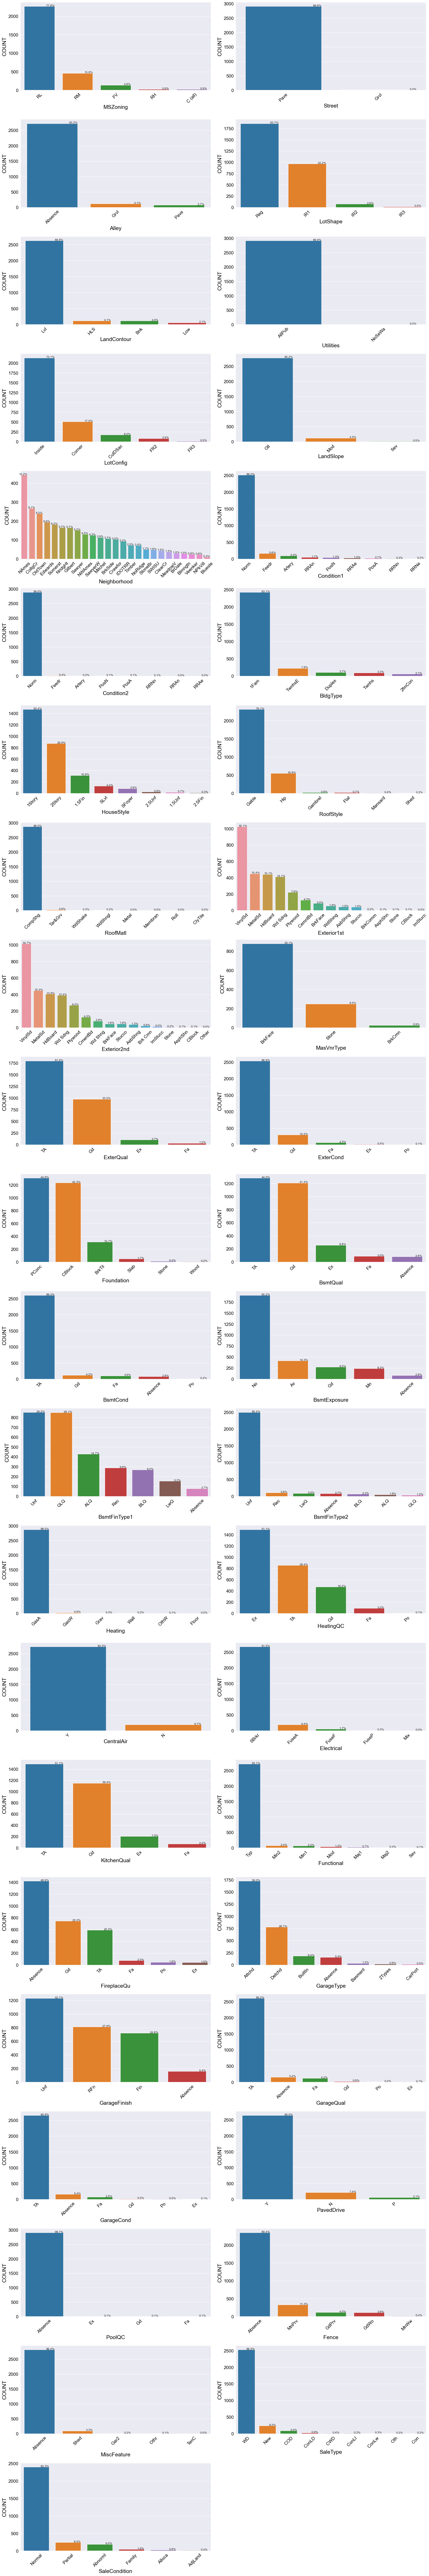

In [21]:
#Second alternative for visualization
fig = plt.figure(figsize=(20,140))
for index,col in enumerate(cat.columns):
    plt.subplot(26,2,index+1)
    ax = sns.countplot(x=cat.iloc[:,index], data=cat.dropna(), order=train[col].value_counts().sort_values(ascending=False).index)
    plt.ylabel('COUNT', size = 18,color="black")
    plt.xlabel(col, fontsize = 18,color="black")
    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(train))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='right')

fig.tight_layout(pad=1.0)

In [22]:
cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### 2.1.A.1Creating New Features

In [23]:
#Adding some columns related to features that there are in the house (train)
train['Pool_'] = train.apply(lambda x: 'No' if x['PoolQC']=='Absence' else 'Yes', axis=1)
train['Basement_'] = train.apply(lambda x: 'No' if x['BsmtQual']=='Absence' else 'Yes', axis=1)
train['Fence_'] = train.apply(lambda x: 'No' if x['Fence']=='Absence' else 'Yes', axis=1)
train['Fireplace_'] = train.apply(lambda x: 'No' if x['FireplaceQu']=='Absence' else 'Yes', axis=1)
train['Garage_'] = train.apply(lambda x: 'No' if x['GarageType']=='Absence' else 'Yes', axis=1)
train['Alley_'] = train.apply(lambda x: 'No' if x['Alley']=='Absence' else 'Yes', axis=1)

In [24]:
train[['Pool_','Basement_','Fence_','Fireplace_','Garage_','Alley_']].head()

Pool_ Basement_ Fence_ Fireplace_ Garage_ Alley_
0    No       Yes     No         No     Yes     No
1    No       Yes     No        Yes     Yes     No
2    No       Yes     No        Yes     Yes     No
3    No       Yes     No        Yes     Yes     No
4    No       Yes     No        Yes     Yes     No

In [25]:
print(train.shape)


(2919, 87)


#### 2.1.A.2 Elimination of the columns with more than 95% values

In [26]:
# Create empty lists to store the useful and useless variables
usefull = []
useless = []

cat = train.select_dtypes(include=['object'])

# Create a dictionary to store the category counts
category_counts = {}

# Loop through each categorical variable
for variable in cat:

    # Count the number of occurrences of each category in the variable
    category_counts[variable] = {}
    for category in train[variable].unique():
        # Skip NaN categories
        if pd.isna(category):
            continue
        category_counts[variable][category] = train[variable].value_counts(normalize=True)[category]

    # Calculate the total count of categories across all variables
    total_count = sum(category_counts[variable].values())

    # Check if any category has a count of 95% or more
    for category in category_counts[variable]:
        if category_counts[variable][category] >= 0.95:
            useless.append(variable)
            break

    # If no category has a count of 95% or more, add the variable to the useful list
    if variable not in useless:
        usefull.append(variable)

    # Calculate the percentage of each category relative to the total count
    for category in category_counts[variable]:
        category_counts[variable][category] = category_counts[variable][category] / total_count * 100

# Print the category counts for each variable
for variable in cat:
    print(f"Variable: {variable}")
    for category, count in category_counts[variable].items():
        print(f"{category}: {count:.2f}%")
    print("\n")

# Print the useful and useless lists
print(f"Usefull variables: {usefull}")
print(f"Useless variables: {useless}")

Variable: MSZoning
RL: 77.70%
RM: 15.78%
C (all): 0.86%
FV: 4.77%
RH: 0.89%


Variable: Street
Pave: 99.59%
Grvl: 0.41%


Variable: Alley
Absence: 93.22%
Grvl: 4.11%
Pave: 2.67%


Variable: LotShape
Reg: 63.69%
IR1: 33.16%
IR2: 2.60%
IR3: 0.55%


Variable: LandContour
Lvl: 89.83%
Bnk: 4.01%
Low: 2.06%
HLS: 4.11%


Variable: Utilities
AllPub: 99.97%
NoSeWa: 0.03%


Variable: LotConfig
Inside: 73.07%
FR2: 2.91%
Corner: 17.51%
CulDSac: 6.03%
FR3: 0.48%


Variable: LandSlope
Gtl: 95.17%
Mod: 4.28%
Sev: 0.55%


Variable: Neighborhood
CollgCr: 9.15%
Veenker: 0.82%
Crawfor: 3.53%
NoRidge: 2.43%
Mitchel: 3.91%
Somerst: 6.24%
NWAmes: 4.49%
OldTown: 8.19%
BrkSide: 3.70%
Sawyer: 5.17%
NridgHt: 5.69%
NAmes: 15.18%
SawyerW: 4.28%
IDOTRR: 3.19%
MeadowV: 1.27%
Edwards: 6.65%
Timber: 2.47%
Gilbert: 5.65%
StoneBr: 1.75%
ClearCr: 1.51%
NPkVill: 0.79%
Blmngtn: 0.96%
BrDale: 1.03%
SWISU: 1.64%
Blueste: 0.34%


Variable: Condition1
Norm: 86.02%
Feedr: 5.62%
PosN: 1.34%
Artery: 3.15%
RRAe: 0.96%
RRNn: 0.31%

In [27]:
# Print the category counts for each variable
for variable in useless:
    print(f"Variable: {variable}")
    for category, count in category_counts[variable].items():
        print(f"{category}: {count:.2f}%")
    print("\n")

Variable: Street
Pave: 99.59%
Grvl: 0.41%


Variable: Utilities
AllPub: 99.97%
NoSeWa: 0.03%


Variable: LandSlope
Gtl: 95.17%
Mod: 4.28%
Sev: 0.55%


Variable: Condition2
Norm: 98.97%
Artery: 0.17%
RRNn: 0.07%
Feedr: 0.45%
PosN: 0.14%
PosA: 0.14%
RRAn: 0.03%
RRAe: 0.03%


Variable: RoofMatl
CompShg: 98.53%
WdShngl: 0.24%
Metal: 0.03%
WdShake: 0.31%
Membran: 0.03%
Tar&Grv: 0.79%
Roll: 0.03%
ClyTile: 0.03%


Variable: Heating
GasA: 98.46%
GasW: 0.92%
Grav: 0.31%
Wall: 0.21%
OthW: 0.07%
Floor: 0.03%


Variable: PoolQC
Absence: 99.66%
Ex: 0.14%
Fa: 0.07%
Gd: 0.14%


Variable: MiscFeature
Absence: 96.40%
Shed: 3.25%
Gar2: 0.17%
Othr: 0.14%
TenC: 0.03%


Variable: Pool_
No: 99.66%
Yes: 0.34%


Variable: Basement_
Yes: 97.23%
No: 2.77%



In [28]:
useless

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'PoolQC',
 'MiscFeature',
 'Pool_',
 'Basement_']

<Axes: xlabel='PoolQC', ylabel='SalePrice'>

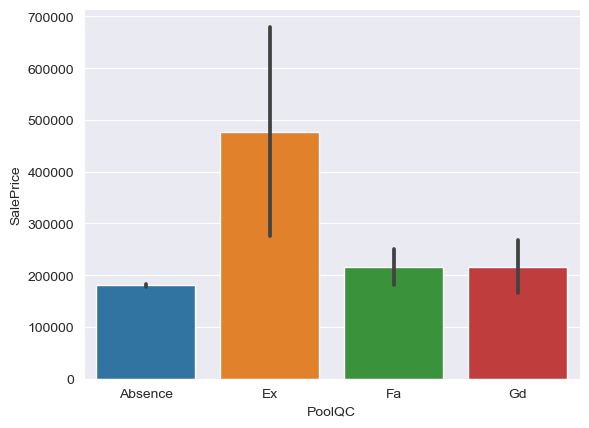

In [29]:
sns.barplot(x=train['PoolQC'], y=train['SalePrice'])

In [30]:
#We have decided to remove these columns from dataset due to we believe that they do not give us accurate information.
train = train.drop(useless, axis=1)

print(train.shape)


(2919, 77)


In [31]:
cat_2 = train.select_dtypes(include='object')
for col in cat_2:
  print(train[col].value_counts(normalize=True).round(2))

MSZoning
RL        0.78
RM        0.16
FV        0.05
RH        0.01
C (all)   0.01
Name: proportion, dtype: float64
Alley
Absence   0.93
Grvl      0.04
Pave      0.03
Name: proportion, dtype: float64
LotShape
Reg   0.64
IR1   0.33
IR2   0.03
IR3   0.01
Name: proportion, dtype: float64
LandContour
Lvl   0.90
HLS   0.04
Bnk   0.04
Low   0.02
Name: proportion, dtype: float64
LotConfig
Inside    0.73
Corner    0.18
CulDSac   0.06
FR2       0.03
FR3       0.00
Name: proportion, dtype: float64
Neighborhood
NAmes     0.15
CollgCr   0.09
OldTown   0.08
Edwards   0.07
Somerst   0.06
NridgHt   0.06
Gilbert   0.06
Sawyer    0.05
NWAmes    0.04
SawyerW   0.04
Mitchel   0.04
BrkSide   0.04
Crawfor   0.04
IDOTRR    0.03
Timber    0.02
NoRidge   0.02
StoneBr   0.02
SWISU     0.02
ClearCr   0.02
MeadowV   0.01
BrDale    0.01
Blmngtn   0.01
Veenker   0.01
NPkVill   0.01
Blueste   0.00
Name: proportion, dtype: float64
Condition1
Norm     0.86
Feedr    0.06
Artery   0.03
RRAn     0.02
PosN     0.01
RRAe

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a list of categorical columns
cat_cols = [col for col in train.columns if train[col].dtype == 'object']

# create a crosstab and plot heatmap for each pair of columns with mean SalePrice greater than 300000
for i, col in enumerate(cat_cols):
    for j in range(i+1, len(cat_cols)):
        other_col = cat_cols[j]
        ct = pd.crosstab(train[col], train[other_col], values=train['SalePrice'], aggfunc=np.mean).round(0)
        if ct.mean().mean() > 250000:
            fig, ax = plt.subplots()
            sns.heatmap(ct, annot=True, fmt='g', cmap='rocket_r', cbar=False, ax=ax)
            ax.set_title(f"{col} vs {other_col}")
plt.show()

In [33]:
#train[(train['Alley_']=='No')&(train['ExterQual']=='Ex')]
#train[(train['Fence_']=='No')&(train['ExterQual']=='Ex')]
#train[(train['ExterQual']=='Ex')&(train['MasVnrType']=='Stone')]
#train[(train['ExterQual']=='Ex')&(train['MasVnrType']=='BrkFace')]
#train[(train['ExterQual']=='Ex')&(train['RoofStylpe']=='Hip')]
train[(train['ExterQual']=='Ex')&(train['Condition1']=='PosA')]

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
203   1664          20       RL       105.00    13693  Absence      Reg   
807   2268          20       RL        81.00    13870  Absence      IR1   
1138  2599          20       RL        85.00    12633  Absence      IR1   

     LandContour LotConfig Neighborhood Condition1 BldgType HouseStyle  \
203          Lvl    Inside      NridgHt       PosA     1Fam     1Story   
807          HLS    Inside      StoneBr       PosA     1Fam     1Story   
1138         HLS    Inside       Timber       PosA     1Fam     1Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
203            10            5       2007          2007       Hip     VinylSd   
807            10            5       2006          2007       Hip     CemntBd   
1138           10            5       2006          2007       Hip     MetalSd   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
203      VinylSd      Stone      472.00        Ex        TA      PConc   
807      CmentBd    BrkFace      250.00        Ex        TA      PConc   
1138     MetalSd    BrkFace      242.00        Ex        TA      PConc   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
203        Ex       TA           Gd          GLQ     2288.00          Unf   
807        Ex       TA           Gd          GLQ     1152.00          Unf   
1138       Ex       TA           Gd          Unf        0.00          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  \
203         0.00     342.00      2630.00        Ex          Y      SBrkr   
807         0.00     590.00      1742.00        Ex          Y      SBrkr   
1138        0.00    1824.00      1824.00        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
203       2674         0             0       2674          2.00          0.00   
807       2042         0             0       2042          1.00          0.00   
1138      1824         0             0       1824          0.00          0.00   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
203          2         1             2             1          Ex   
807          2         0             3             1          Ex   
1138         2         0             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
203              8        Typ           2          Gd     Attchd      2007.00   
807              8        Typ           1          Gd     Attchd      2007.00   
1138             8        Typ           1          Gd     Attchd      2006.00   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
203           Fin        3.00      762.00         TA         TA          Y   
807           Fin        3.00      724.00         TA         TA          Y   
1138          Fin        3.00      932.00         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
203          360           50              0          0            0   
807          240           52              0          0          174   
1138         160           36              0          0          108   

      PoolArea    Fence  MiscVal  MoSold  YrSold SaleType SaleCondition  \
203          0  Absence        0       3    2009       WD        Normal   
807          0  Absence        0      10    2007      New       Partial   
1138         0  Absence        0       9    2007      New       Partial   

      SalePrice Fence_ Fireplace_ Garage_ Alley_  
203   610000.00     No        Yes     Yes     No  
807   455000.00     No        Yes     Yes     No  
1138  392000.00     No        Yes     Yes     No

In [34]:
col = train[['Fence_','Fireplace_','Garage_','Alley_']]
for col in col:
  print(train[col].value_counts(normalize=True).round(2))

Fence_
No    0.80
Yes   0.20
Name: proportion, dtype: float64
Fireplace_
Yes   0.51
No    0.49
Name: proportion, dtype: float64
Garage_
Yes   0.95
No    0.05
Name: proportion, dtype: float64
Alley_
No    0.93
Yes   0.07
Name: proportion, dtype: float64


#### 2.1.A.3 Rare Encoding

In [35]:
# Get list of categorical columns
categorical_columns = train.select_dtypes(include='object').columns

# Set the threshold for rare categories
threshold = 0.05

# Loop over all categorical columns and apply rare encoding
for column in categorical_columns:
    counts = train[column].value_counts(normalize=True)
    rare_categories = counts[counts < threshold].index.tolist()

    def replace_with_rare(category):
        if category in rare_categories:
            return 'rare_category'
        else:
            return category

    train[column] = train[column].apply(replace_with_rare)

In [36]:
for col in train[categorical_columns]:
  print(train[col].value_counts(normalize=True).round(2))

MSZoning
RL              0.78
RM              0.16
rare_category   0.07
Name: proportion, dtype: float64
Alley
Absence         0.93
rare_category   0.07
Name: proportion, dtype: float64
LotShape
Reg             0.64
IR1             0.33
rare_category   0.03
Name: proportion, dtype: float64
LandContour
Lvl             0.90
rare_category   0.10
Name: proportion, dtype: float64
LotConfig
Inside          0.73
Corner          0.18
CulDSac         0.06
rare_category   0.03
Name: proportion, dtype: float64
Neighborhood
rare_category   0.38
NAmes           0.15
CollgCr         0.09
OldTown         0.08
Edwards         0.07
Somerst         0.06
NridgHt         0.06
Gilbert         0.06
Sawyer          0.05
Name: proportion, dtype: float64
Condition1
Norm            0.86
rare_category   0.08
Feedr           0.06
Name: proportion, dtype: float64
BldgType
1Fam            0.83
rare_category   0.09
TwnhsE          0.08
Name: proportion, dtype: float64
HouseStyle
1Story          0.50
2Story          

In [37]:
print(train.shape)


(2919, 77)


### 2.1.B. Numerical Features

In [38]:
#checked the numerical columns
num = train.select_dtypes(exclude=['object'])
num


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60        65.00     8450            7            5   
1        2          20        80.00     9600            6            8   
2        3          60        68.00    11250            7            5   
3        4          70        60.00     9550            7            5   
4        5          60        84.00    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160        21.00     1936            4            7   
1455  2916         160        21.00     1894            4            5   
1456  2917          20       160.00    20000            5            7   
1457  2918          85        62.00    10441            5            5   
1458  2919          60        74.00     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003      196.00      706.00        0.00     150.00   
1          1976          1976        0.00      978.00        0.00     284.00   
2          2001          2002      162.00      486.00        0.00     434.00   
3          1915          1970        0.00      216.00        0.00     540.00   
4          2000          2000      350.00      655.00        0.00     490.00   
...         ...           ...         ...         ...         ...        ...   
1454       1970          1970        0.00        0.00        0.00     546.00   
1455       1970          1970        0.00      252.00        0.00     294.00   
1456       1960          1996        0.00     1224.00        0.00       0.00   
1457       1992          1992        0.00      337.00        0.00     575.00   
1458       1993          1994       94.00      758.00        0.00     238.00   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856.00       856       854             0       1710          1.00   
1         1262.00      1262         0             0       1262          0.00   
2          920.00       920       866             0       1786          1.00   
3          756.00       961       756             0       1717          1.00   
4         1145.00      1145      1053             0       2198          1.00   
...           ...       ...       ...           ...        ...           ...   
1454       546.00       546       546             0       1092          0.00   
1455       546.00       546       546             0       1092          0.00   
1456      1224.00      1224         0             0       1224          1.00   
1457       912.00       970         0             0        970          0.00   
1458       996.00       996      1004             0       2000          0.00   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0.00         2         1             3             1   
1             1.00         2         0             3             1   
2             0.00         2         1             3             1   
3             0.00         1         0             3             1   
4             0.00         2         1             4             1   
...            ...       ...       ...           ...           ...   
1454          0.00         1         1             3             1   
1455          0.00         1         1             3             1   
1456          0.00         1         0             4             1   
1457          1.00         1         0             3             1   
1458          0.00         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0      2003.00        2.00      548.00   
1                6           1      1976.00        2.00      460.00   
2                6           1      2001.00        2.00      608.00   
3                7           1      1998.00        3.00      642.00   
4

In [39]:
num[['1stFlrSF','2ndFlrSF']]

1stFlrSF  2ndFlrSF
0          856       854
1         1262         0
2          920       866
3          961       756
4         1145      1053
...        ...       ...
1454       546       546
1455       546       546
1456      1224         0
1457       970         0
1458       996      1004

[2919 rows x 2 columns]

In [40]:
#checked the summary statistics of the numerical variables - eliminated the ID column because its not a variable that we will use in model.
#We have to check the columns that have 2 or 3 different values because they can be categorical not numerical variables.
#MSSubClass integer but it identifies the type of dwelling involved in the sale.
#OverallQual integer but it rates overall material of the house (ordinal) - kategorikmiş gibi davranıcaz başta. Hist veya barplot
#OverallCond integer but it rates overall condition of the house (ordinal)
#YearBuilt integer but it is a date. - günümüzden çıkarıp yaş olarak da dikkate alabiliriz yıl olarak da kalabilir.
#YearRemodAdd integer but it is a date.
#MoSold integer but it is month sold
#YrSold integer but its year sold
#GarageYrBuilt is float but its year garage was built, so type of the column should be changed.
num.iloc[:,1:].describe([0.25,0.50,0.75,0.99]).T

count      mean      std      min       25%       50%  \
MSSubClass    2919.00     57.14    42.52    20.00     20.00     50.00   
LotFrontage   2433.00     69.31    23.34    21.00     59.00     68.00   
LotArea       2919.00  10168.11  7887.00  1300.00   7478.00   9453.00   
OverallQual   2919.00      6.09     1.41     1.00      5.00      6.00   
OverallCond   2919.00      5.56     1.11     1.00      5.00      5.00   
YearBuilt     2919.00   1971.31    30.29  1872.00   1953.50   1973.00   
YearRemodAdd  2919.00   1984.26    20.89  1950.00   1965.00   1993.00   
MasVnrArea    2896.00    102.20   179.33     0.00      0.00      0.00   
BsmtFinSF1    2918.00    441.42   455.61     0.00      0.00    368.50   
BsmtFinSF2    2918.00     49.58   169.21     0.00      0.00      0.00   
BsmtUnfSF     2918.00    560.77   439.54     0.00    220.00    467.00   
TotalBsmtSF   2918.00   1051.78   440.77     0.00    793.00    989.50   
1stFlrSF      2919.00   1159.58   392.36   334.00    876.00   1082.00   
2ndFlrSF      2919.00    336.48   428.70     0.00      0.00      0.00   
LowQualFinSF  2919.00      4.69    46.40     0.00      0.00      0.00   
GrLivArea     2919.00   1500.76   506.05   334.00   1126.00   1444.00   
BsmtFullBath  2917.00      0.43     0.52     0.00      0.00      0.00   
BsmtHalfBath  2917.00      0.06     0.25     0.00      0.00      0.00   
FullBath      2919.00      1.57     0.55     0.00      1.00      2.00   
HalfBath      2919.00      0.38     0.50     0.00      0.00      0.00   
BedroomAbvGr  2919.00      2.86     0.82     0.00      2.00      3.00   
KitchenAbvGr  2919.00      1.04     0.21     0.00      1.00      1.00   
TotRmsAbvGrd  2919.00      6.45     1.57     2.00      5.00      6.00   
Fireplaces    2919.00      0.60     0.65     0.00      0.00      1.00   
GarageYrBlt   2760.00   1978.11    25.57  1895.00   1960.00   1979.00   
GarageCars    2918.00      1.77     0.76     0.00      1.00      2.00   
GarageArea    2918.00    472.87   215.39     0.00    320.00    480.00   
WoodDeckSF    2919.00     93.71   126.53     0.00      0.00      0.00   
OpenPorchSF   2919.00     47.49    67.58     0.00      0.00     26.00   
EnclosedPorch 2919.00     23.10    64.24     0.00      0.00      0.00   
3SsnPorch     2919.00      2.60    25.19     0.00      0.00      0.00   
ScreenPorch   2919.00     16.06    56.18     0.00      0.00      0.00   
PoolArea      2919.00      2.25    35.66     0.00      0.00      0.00   
MiscVal       2919.00     50.83   567.40     0.00      0.00      0.00   
MoSold        2919.00      6.21     2.71     1.00      4.00      6.00   
YrSold        2919.00   2007.79     1.31  2006.00   2007.00   2008.00   
SalePrice     2919.00 180707.33 79970.41 12789.00 129325.00 160000.00   

                    75%       99%       max  
MSSubClass        70.00    190.00    190.00  
LotFrontage       80.00    135.68    313.00  
LotArea        11570.00  33038.64 215245.00  
OverallQual        7.00     10.00     10.00  
OverallCond        6.00      9.00      9.00  
YearBuilt       2001.00   2008.00   2010.00  
YearRemodAdd    2004.00   2009.00   2010.00  
MasVnrArea       164.00    771.05   1600.00  
BsmtFinSF1       733.00   1635.32   5644.00  
BsmtFinSF2         0.00    874.66   1526.00  
BsmtUnfSF        805.50   1776.49   2336.00  
TotalBsmtSF     1302.00   2198.30   6110.00  
1stFlrSF        1387.50   2288.02   5095.00  
2ndFlrSF         704.00   1400.20   2065.00  
LowQualFinSF       0.00    153.84   1064.00  
GrLivArea       1743.50   2935.72   5642.00  
BsmtFullBath       1.00      2.00      3.00  
BsmtHalfBath       0.00      1.00      2.00  
FullBath           2.00      3.00      4.00  
HalfBath           1.00      1.00      2.00  
BedroomAbvGr       3.00      5.00      8.00  
KitchenAbvGr       1.00      2.00      3.00  
TotRmsAbvGrd       7.00     11.00     15.00  
Fireplaces         1.00      2.00      4.00  
GarageYrBlt     2002.00   2009.00   2207.00  
GarageCars         2.00      3.00      5.00  

In [41]:
#droped the Id column in num dataset to explore the data correctly.
num_2 = num.drop(['Id','GarageYrBlt', 'MoSold','MSSubClass', 'YearBuilt','YearRemodAdd','YrSold','OverallCond','OverallQual','GarageCars','BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                  'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'], axis=1)
num_2

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           65.00     8450      196.00      706.00        0.00     150.00   
1           80.00     9600        0.00      978.00        0.00     284.00   
2           68.00    11250      162.00      486.00        0.00     434.00   
3           60.00     9550        0.00      216.00        0.00     540.00   
4           84.00    14260      350.00      655.00        0.00     490.00   
...           ...      ...         ...         ...         ...        ...   
1454        21.00     1936        0.00        0.00        0.00     546.00   
1455        21.00     1894        0.00      252.00        0.00     294.00   
1456       160.00    20000        0.00     1224.00        0.00       0.00   
1457        62.00    10441        0.00      337.00        0.00     575.00   
1458        74.00     9627       94.00      758.00        0.00     238.00   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856.00       856       854             0       1710      548.00   
1         1262.00      1262         0             0       1262      460.00   
2          920.00       920       866             0       1786      608.00   
3          756.00       961       756             0       1717      642.00   
4         1145.00      1145      1053             0       2198      836.00   
...           ...       ...       ...           ...        ...         ...   
1454       546.00       546       546             0       1092        0.00   
1455       546.00       546       546             0       1092      286.00   
1456      1224.00      1224         0             0       1224      576.00   
1457       912.00       970         0             0        970        0.00   
1458       996.00       996      1004             0       2000      650.00   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1454           0            0              0          0            0   
1455           0           24              0          0            0   
1456         474            0              0          0            0   
1457          80           32              0          0            0   
1458         190           48              0          0            0   

      PoolArea  MiscVal  SalePrice  
0            0        0  208500.00  
1            0        0  181500.00  
2            0        0  223500.00  
3            0        0  140000.00  
4            0        0  250000.00  
...        ...      ...        ...  
1454         0        0   90500.00  
1455         0        0   71000.00  
1456         0        0  131000.00  
1457         0      700  132000.00  
1458         0        0  188000.00  

[2919 rows x 20 columns]

In [42]:
num_2.describe().T

count      mean      std      min       25%       50%  \
LotFrontage   2433.00     69.31    23.34    21.00     59.00     68.00   
LotArea       2919.00  10168.11  7887.00  1300.00   7478.00   9453.00   
MasVnrArea    2896.00    102.20   179.33     0.00      0.00      0.00   
BsmtFinSF1    2918.00    441.42   455.61     0.00      0.00    368.50   
BsmtFinSF2    2918.00     49.58   169.21     0.00      0.00      0.00   
BsmtUnfSF     2918.00    560.77   439.54     0.00    220.00    467.00   
TotalBsmtSF   2918.00   1051.78   440.77     0.00    793.00    989.50   
1stFlrSF      2919.00   1159.58   392.36   334.00    876.00   1082.00   
2ndFlrSF      2919.00    336.48   428.70     0.00      0.00      0.00   
LowQualFinSF  2919.00      4.69    46.40     0.00      0.00      0.00   
GrLivArea     2919.00   1500.76   506.05   334.00   1126.00   1444.00   
GarageArea    2918.00    472.87   215.39     0.00    320.00    480.00   
WoodDeckSF    2919.00     93.71   126.53     0.00      0.00      0.00   
OpenPorchSF   2919.00     47.49    67.58     0.00      0.00     26.00   
EnclosedPorch 2919.00     23.10    64.24     0.00      0.00      0.00   
3SsnPorch     2919.00      2.60    25.19     0.00      0.00      0.00   
ScreenPorch   2919.00     16.06    56.18     0.00      0.00      0.00   
PoolArea      2919.00      2.25    35.66     0.00      0.00      0.00   
MiscVal       2919.00     50.83   567.40     0.00      0.00      0.00   
SalePrice     2919.00 180707.33 79970.41 12789.00 129325.00 160000.00   

                    75%       max  
LotFrontage       80.00    313.00  
LotArea        11570.00 215245.00  
MasVnrArea       164.00   1600.00  
BsmtFinSF1       733.00   5644.00  
BsmtFinSF2         0.00   1526.00  
BsmtUnfSF        805.50   2336.00  
TotalBsmtSF     1302.00   6110.00  
1stFlrSF        1387.50   5095.00  
2ndFlrSF         704.00   2065.00  
LowQualFinSF       0.00   1064.00  
GrLivArea       1743.50   5642.00  
GarageArea       576.00   1488.00  
WoodDeckSF       168.00   1424.00  
OpenPorchSF       70.00    742.00  
EnclosedPorch      0.00   1012.00  
3SsnPorch          0.00    508.00  
ScreenPorch        0.00    576.00  
PoolArea           0.00    800.00  
MiscVal            0.00  17000.00  
SalePrice     213495.00 755000.00

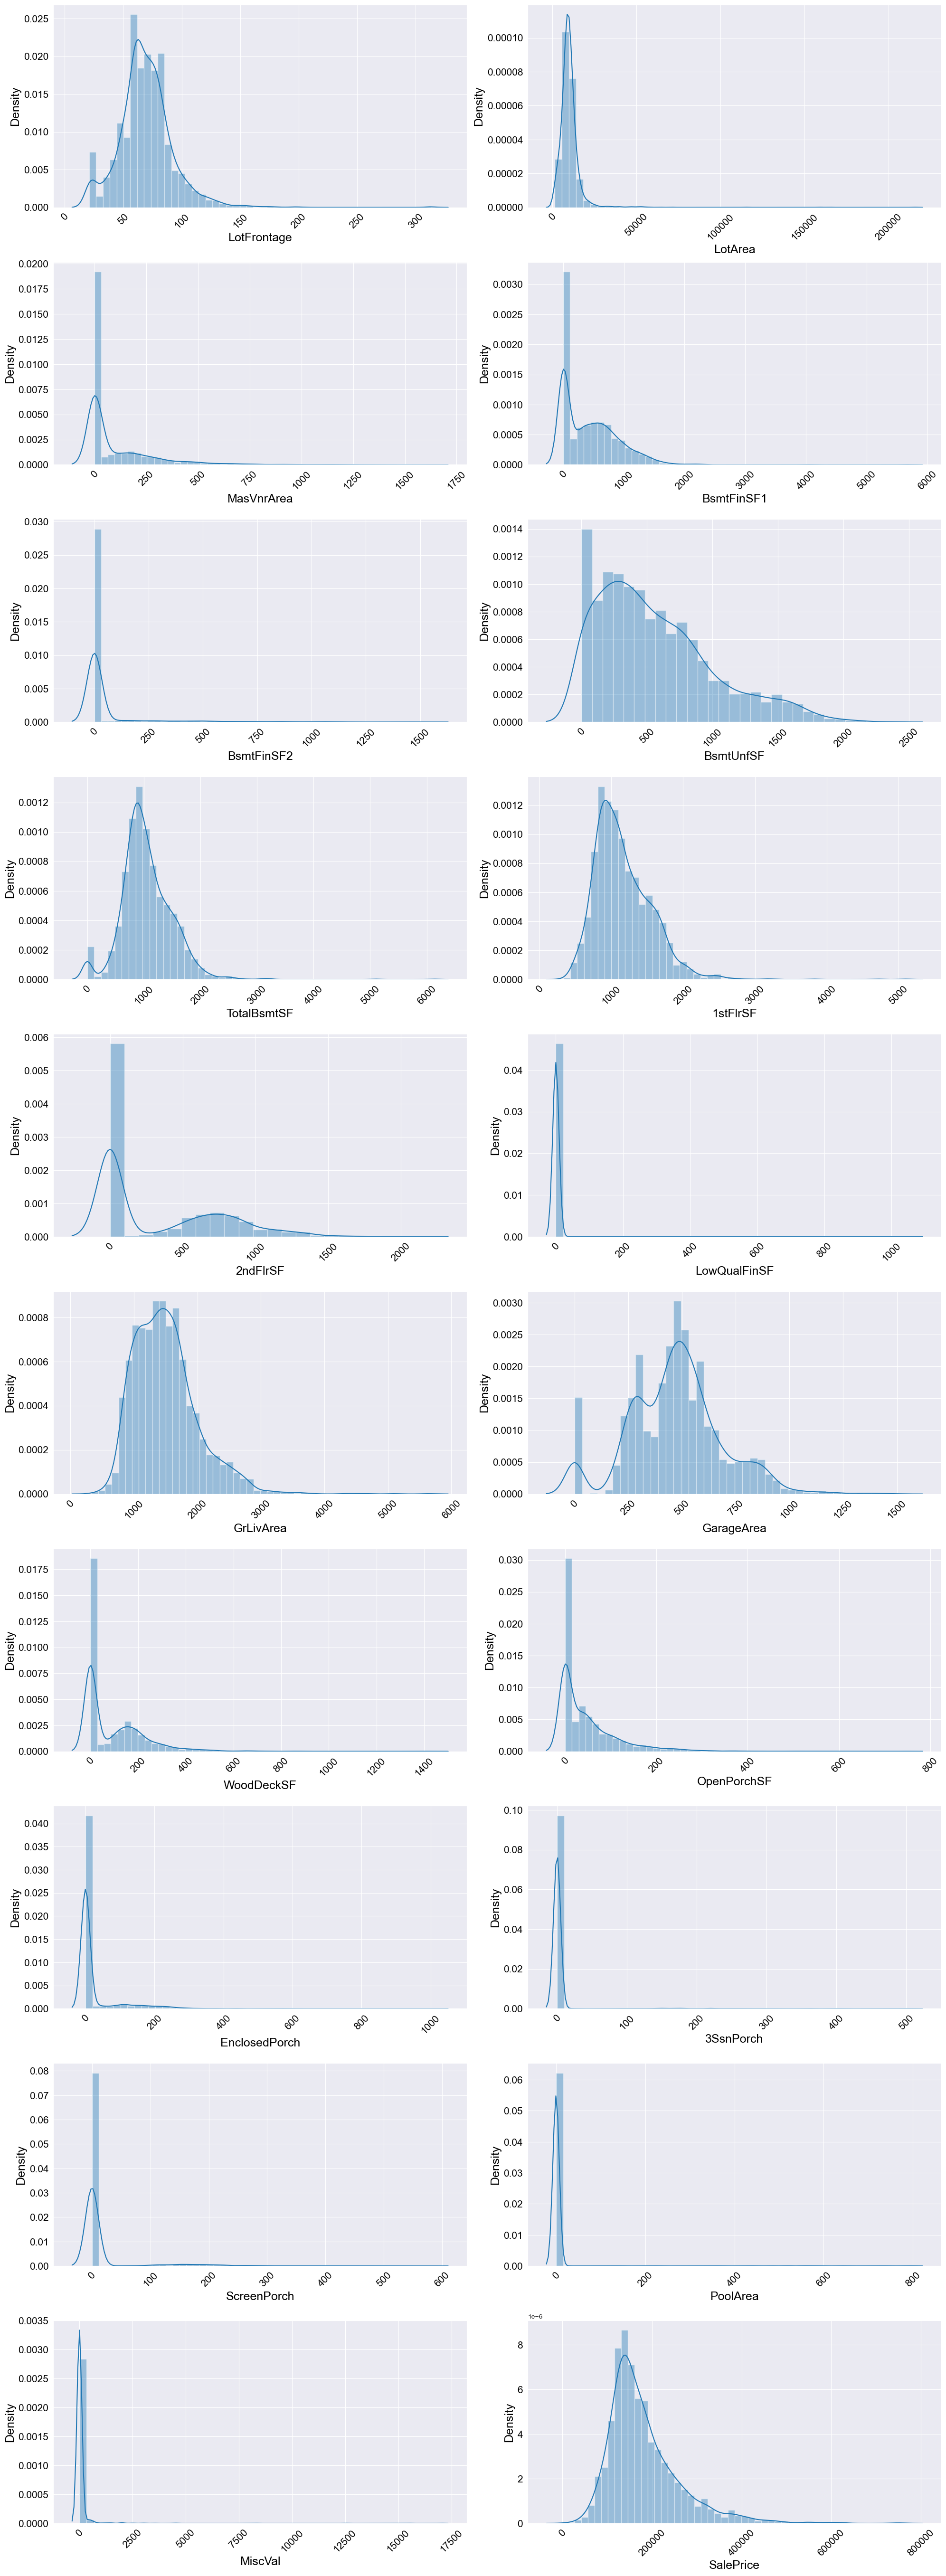

In [43]:
#Second alternative for visualization
fig = plt.figure(figsize=(20,140))
for index,col in enumerate(num_2.columns):
    plt.subplot(26,2,index+1)
    sns.distplot(x=num_2.iloc[:,index])
    plt.ylabel('Density', size = 18,color="black")
    plt.xlabel(col, fontsize = 18,color="black")

    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )

fig.tight_layout(pad=1.0)

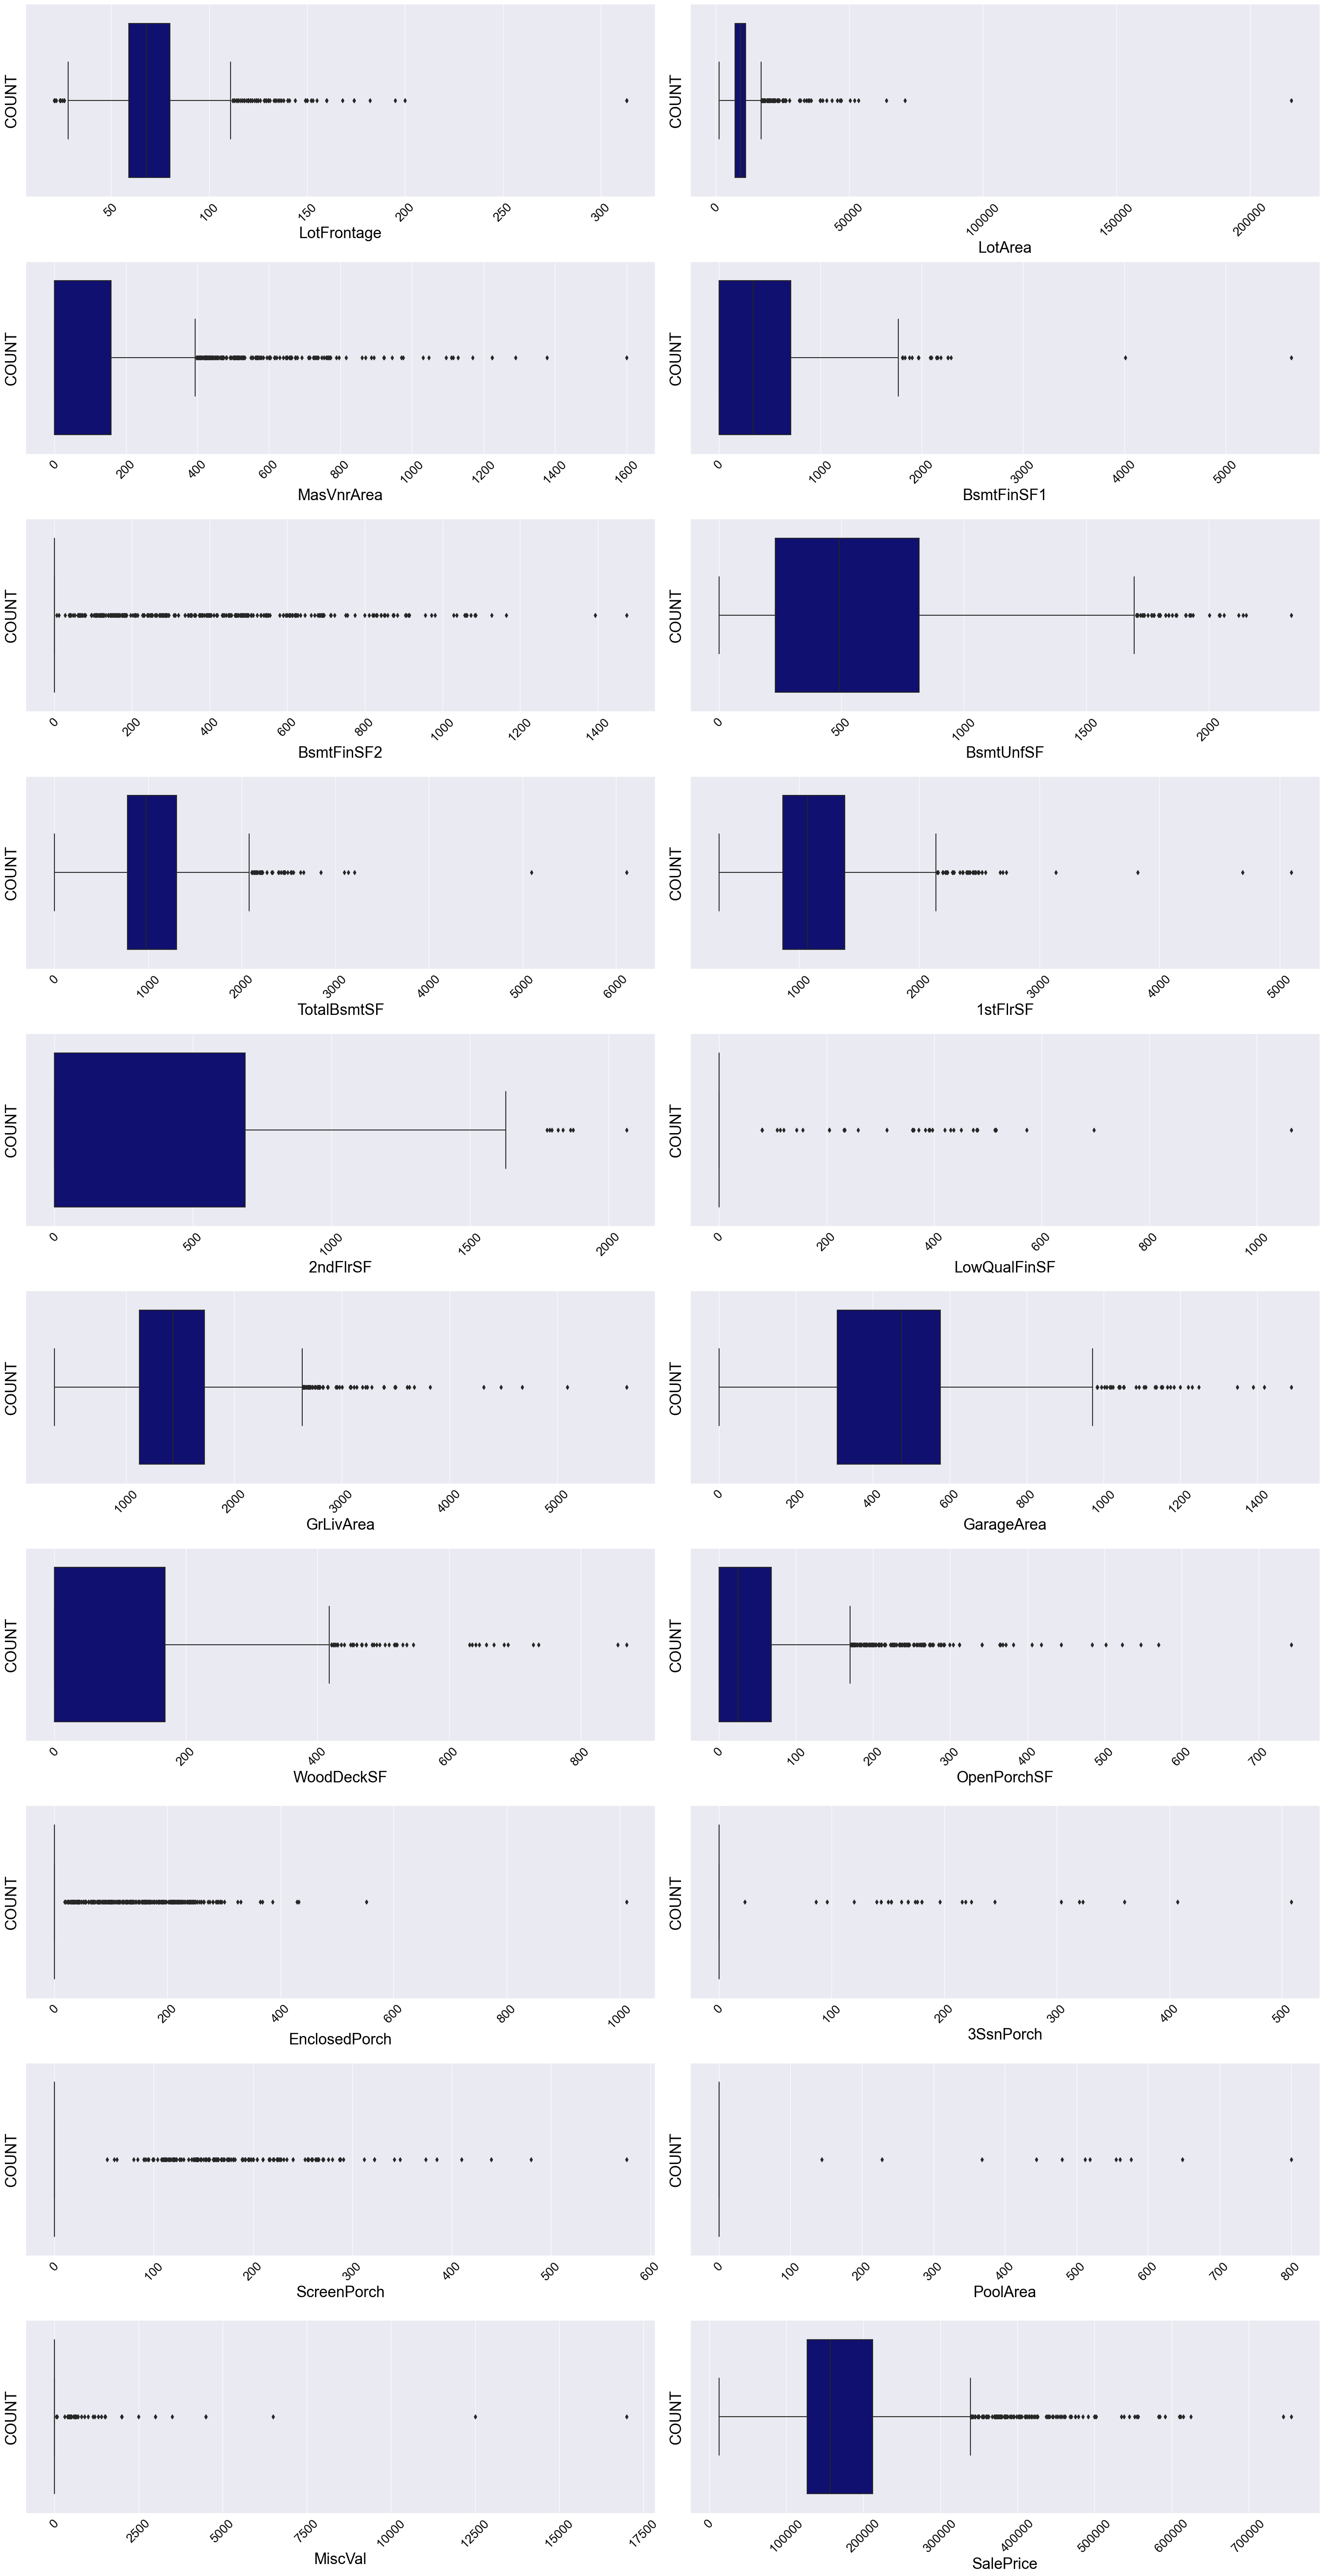

In [44]:
fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_2):
    plt.subplot(26,2,index+1)
    sns.boxplot(x=col, data=num_2.dropna(), color='navy')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

#### 2.1.B.a Elimination of the columns with more then 90% zero

In [45]:
#Check the features have zero value
num_zeros_per_col = (train == 0).sum(axis=0).sort_values(ascending=False).reset_index().rename(columns={'index': 'Feature', 0: 'Count'})
num_zeros_per_col['Proportion'] = num_zeros_per_col['Count'] / len(train)
zero_columns_90_percent = num_zeros_per_col[num_zeros_per_col['Proportion']>=0.90]
zero_columns_90_percent

Feature  Count  Proportion
0      PoolArea   2906        1.00
1     3SsnPorch   2882        0.99
2  LowQualFinSF   2879        0.99
3       MiscVal   2816        0.96
4  BsmtHalfBath   2742        0.94
5   ScreenPorch   2663        0.91

In [46]:
#examine more columns with zero values
zero_columns = zero_columns_90_percent['Feature'].values
train[zero_columns].nunique()

PoolArea         14
3SsnPorch        31
LowQualFinSF     36
MiscVal          38
BsmtHalfBath      3
ScreenPorch     121
dtype: int64

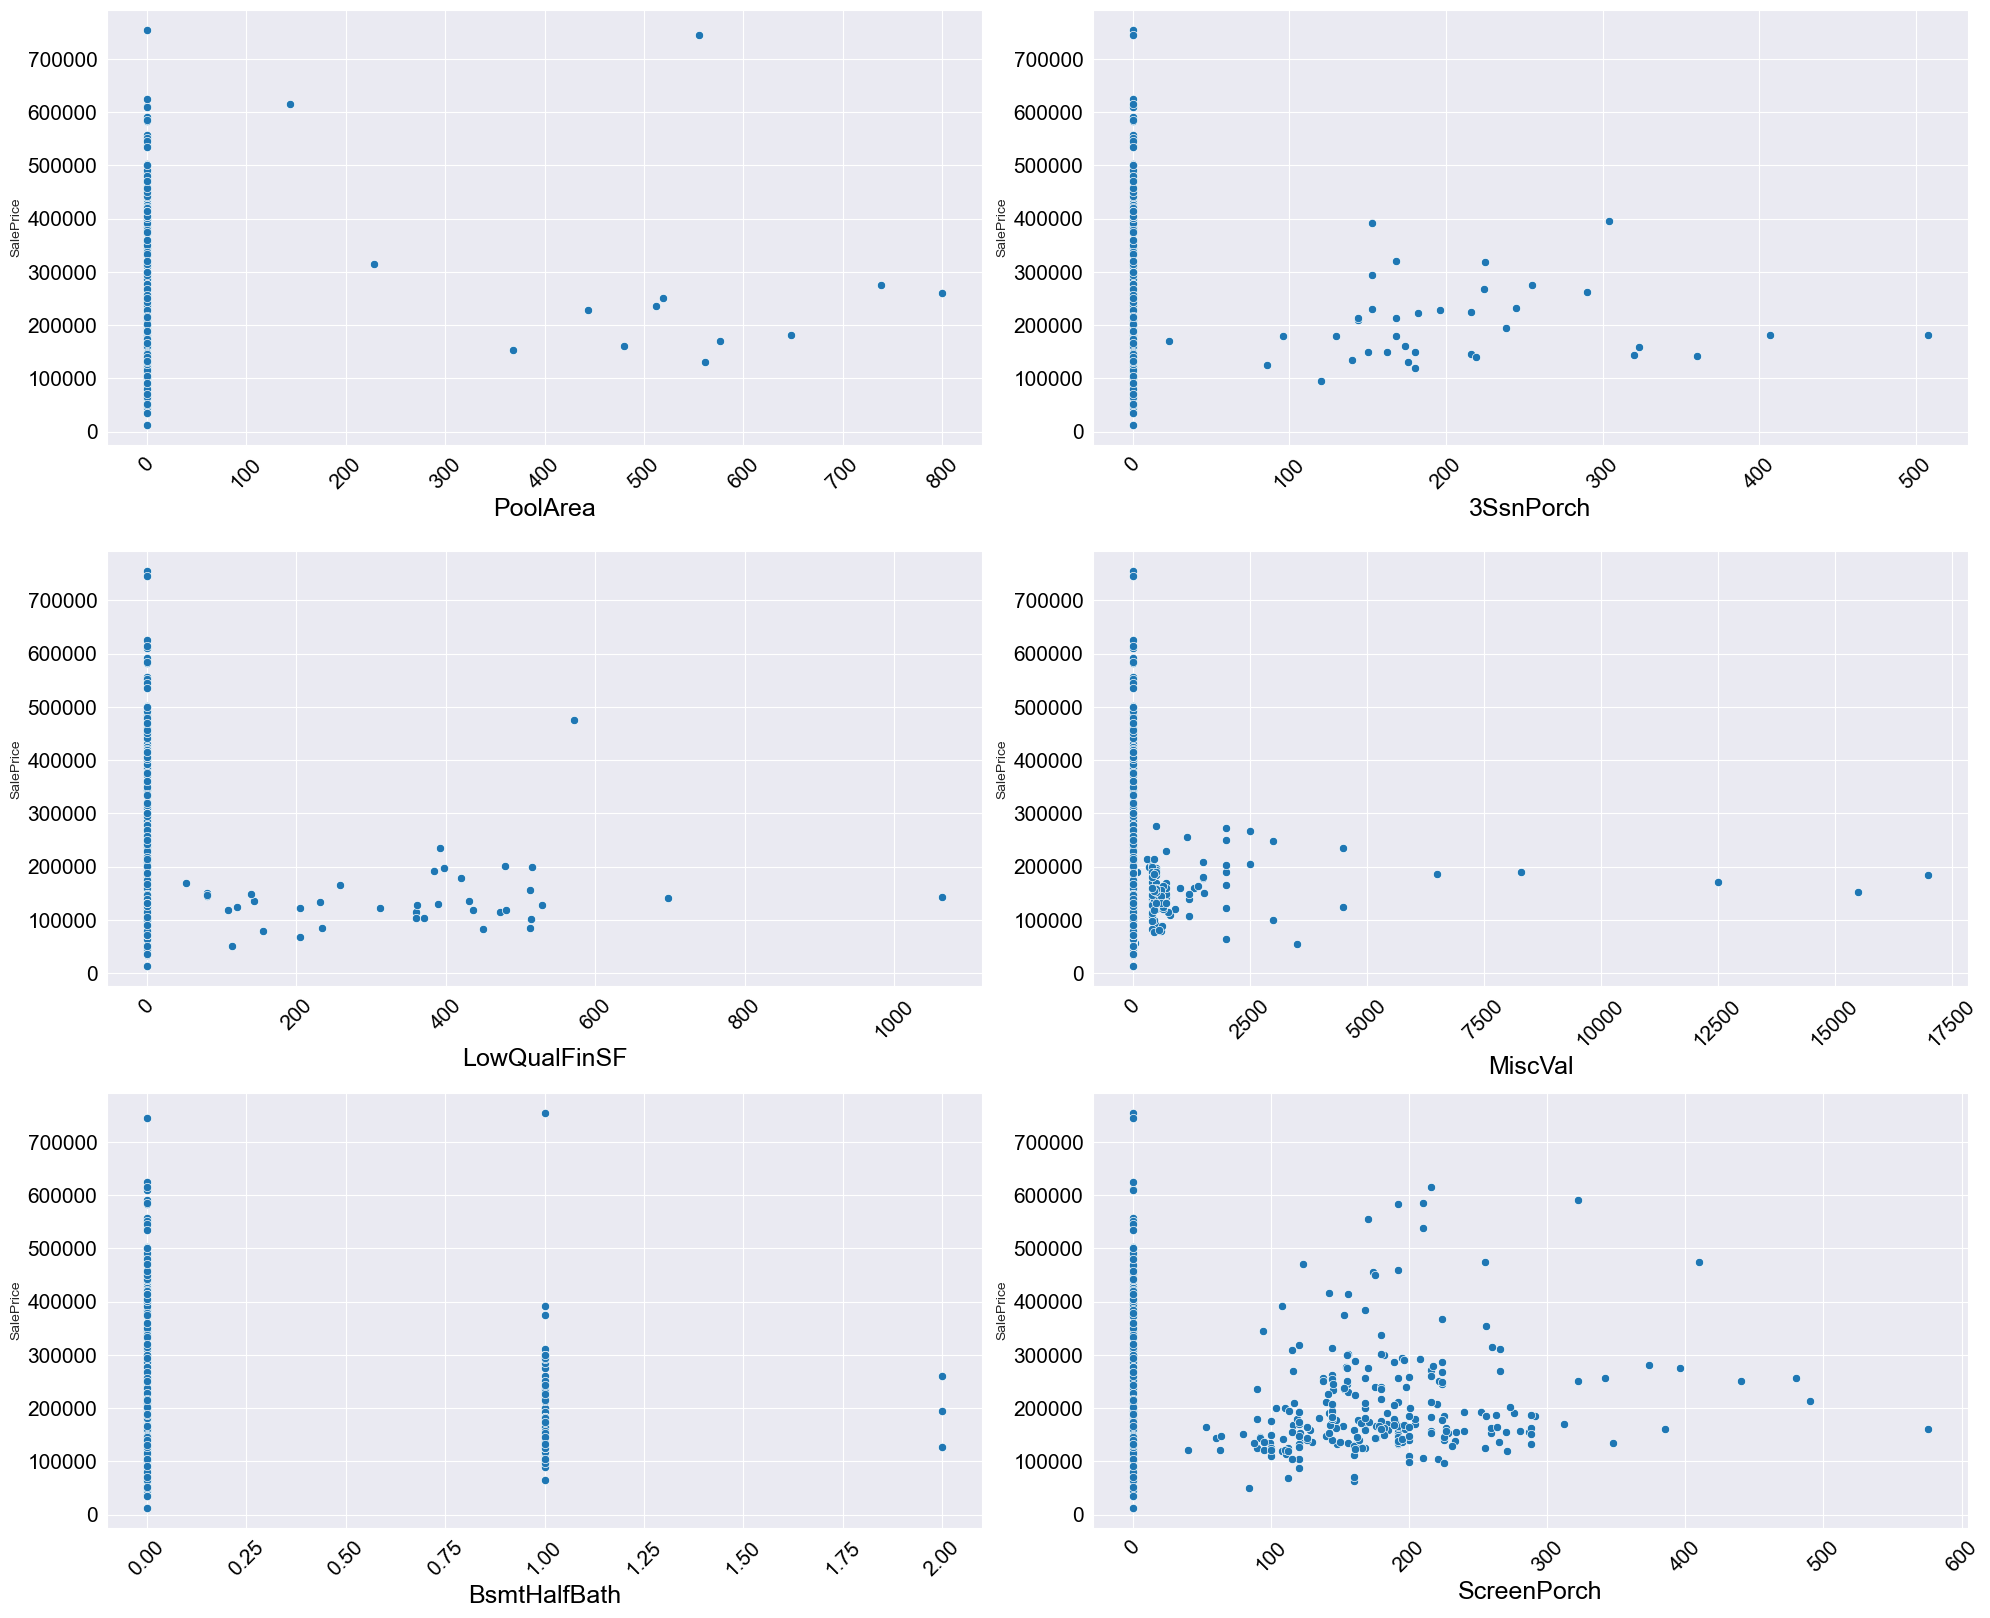

In [47]:

fig = plt.figure(figsize=(20,140))
for index,col in enumerate(train[zero_columns].columns):
    plt.subplot(26,2,index+1)
    sns.scatterplot(x=train[zero_columns].iloc[:,index], y=train['SalePrice'])
    plt.xlabel(col, fontsize = 18,color="black")

    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )

fig.tight_layout(pad=1.0)

In [48]:
train[zero_columns].describe([0.25,0.50,0.75,0.99]).T

count  mean    std  min  25%  50%  75%    99%      max
PoolArea     2919.00  2.25  35.66 0.00 0.00 0.00 0.00   0.00   800.00
3SsnPorch    2919.00  2.60  25.19 0.00 0.00 0.00 0.00 144.00   508.00
LowQualFinSF 2919.00  4.69  46.40 0.00 0.00 0.00 0.00 153.84  1064.00
MiscVal      2919.00 50.83 567.40 0.00 0.00 0.00 0.00 982.00 17000.00
BsmtHalfBath 2917.00  0.06   0.25 0.00 0.00 0.00 0.00   1.00     2.00
ScreenPorch  2919.00 16.06  56.18 0.00 0.00 0.00 0.00 259.82   576.00

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'PoolArea'),
  Text(1, 0, '3SsnPorch'),
  Text(2, 0, 'LowQualFinSF'),
  Text(3, 0, 'MiscVal'),
  Text(4, 0, 'BsmtHalfBath'),
  Text(5, 0, 'ScreenPorch')])

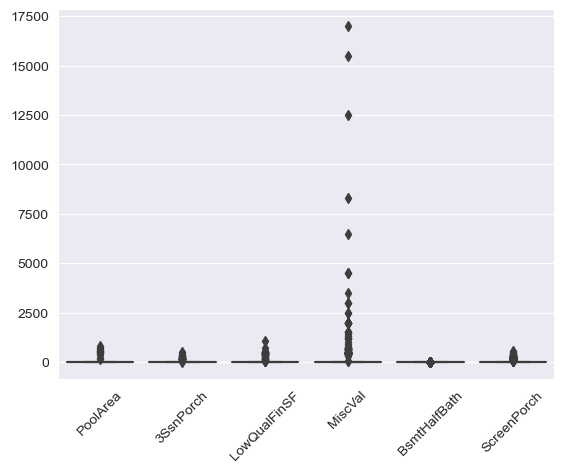

In [49]:
sns.boxplot(train[zero_columns])
plt.xticks(rotation = 45)

In [53]:
zero_columns

array(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath',
       'ScreenPorch'], dtype=object)

In [54]:
#dropped the zero columns from orijinal dataset.
train = train.drop(zero_columns, axis=1)

print(train.shape)


(2919, 71)


In [55]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
0   1          60       RL        65.00     8450  Absence      Reg   
1   2          20       RL        80.00     9600  Absence      Reg   
2   3          60       RL        68.00    11250  Absence      IR1   
3   4          70       RL        60.00     9550  Absence      IR1   
4   5          60       RL        84.00    14260  Absence      IR1   

  LandContour      LotConfig   Neighborhood Condition1 BldgType HouseStyle  \
0         Lvl         Inside        CollgCr       Norm     1Fam     2Story   
1         Lvl  rare_category  rare_category      Feedr     1Fam     1Story   
2         Lvl         Inside        CollgCr       Norm     1Fam     2Story   
3         Lvl         Corner  rare_category       Norm     1Fam     2Story   
4         Lvl  rare_category  rare_category       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
0            7            5       2003          2003     Gable     VinylSd   
1            6            8       1976          1976     Gable     MetalSd   
2            7            5       2001          2002     Gable     VinylSd   
3            7            5       1915          1970     Gable     Wd Sdng   
4            8            5       2000          2000     Gable     VinylSd   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0        VinylSd    BrkFace      196.00        Gd        TA      PConc   
1        MetalSd        NaN        0.00        TA        TA     CBlock   
2        VinylSd    BrkFace      162.00        Gd        TA      PConc   
3  rare_category        NaN        0.00        TA        TA     BrkTil   
4        VinylSd    BrkFace      350.00        Gd        TA      PConc   

  BsmtQual       BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd             TA           No          GLQ      706.00          Unf   
1       Gd             TA           Gd          ALQ      978.00          Unf   
2       Gd             TA           Mn          GLQ      486.00          Unf   
3       TA  rare_category           No          ALQ      216.00          Unf   
4       Gd             TA           Av          GLQ      655.00          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  \
0        0.00     150.00       856.00        Ex          Y      SBrkr   
1        0.00     284.00      1262.00        Ex          Y      SBrkr   
2        0.00     434.00       920.00        Ex          Y      SBrkr   
3        0.00     540.00       756.00        Gd          Y      SBrkr   
4        0.00     490.00      1145.00        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710          1.00         2         1   
1      1262         0       1262          0.00         2         0   
2       920       866       1786          1.00         2         1   
3       961       756       1717          1.00         1         0   
4      1145      1053       2198          1.00         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0     Absence     Attchd      2003.00          RFn        2.00   
1           1          TA     Attchd      1976.00          RFn        2.00   
2           1          TA     Attchd      2001.00          RFn        2.00   
3           1          Gd     Detchd      1998.00          Unf        3.00   
4           1          TA     Attchd      2000.

### 2.1.C. Other Features (Numeric But Categoric)

In [56]:
num_but_cat = train[['MoSold','MSSubClass','OverallCond','OverallQual','GarageCars','BsmtFullBath', 'FullBath',
                  'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']]
num_but_cat

MoSold  MSSubClass  OverallCond  OverallQual  GarageCars  BsmtFullBath  \
0          2          60            5            7        2.00          1.00   
1          5          20            8            6        2.00          0.00   
2          9          60            5            7        2.00          1.00   
3          2          70            5            7        3.00          1.00   
4         12          60            5            8        3.00          1.00   
...      ...         ...          ...          ...         ...           ...   
1454       6         160            7            4        0.00          0.00   
1455       4         160            5            4        1.00          0.00   
1456       9          20            7            5        2.00          1.00   
1457       7          85            5            5        0.00          0.00   
1458      11          60            5            7        3.00          0.00   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  
0            2         1             3             1             8           0  
1            2         0             3             1             6           1  
2            2         1             3             1             6           1  
3            1         0             3             1             7           1  
4            2         1             4             1             9           1  
...        ...       ...           ...           ...           ...         ...  
1454         1         1             3             1             5           0  
1455         1         1             3             1             6           0  
1456         1         0             4             1             7           1  
1457         1         0             3             1             6           0  
1458         2         1             3             1             9           1  

[2919 rows x 12 columns]

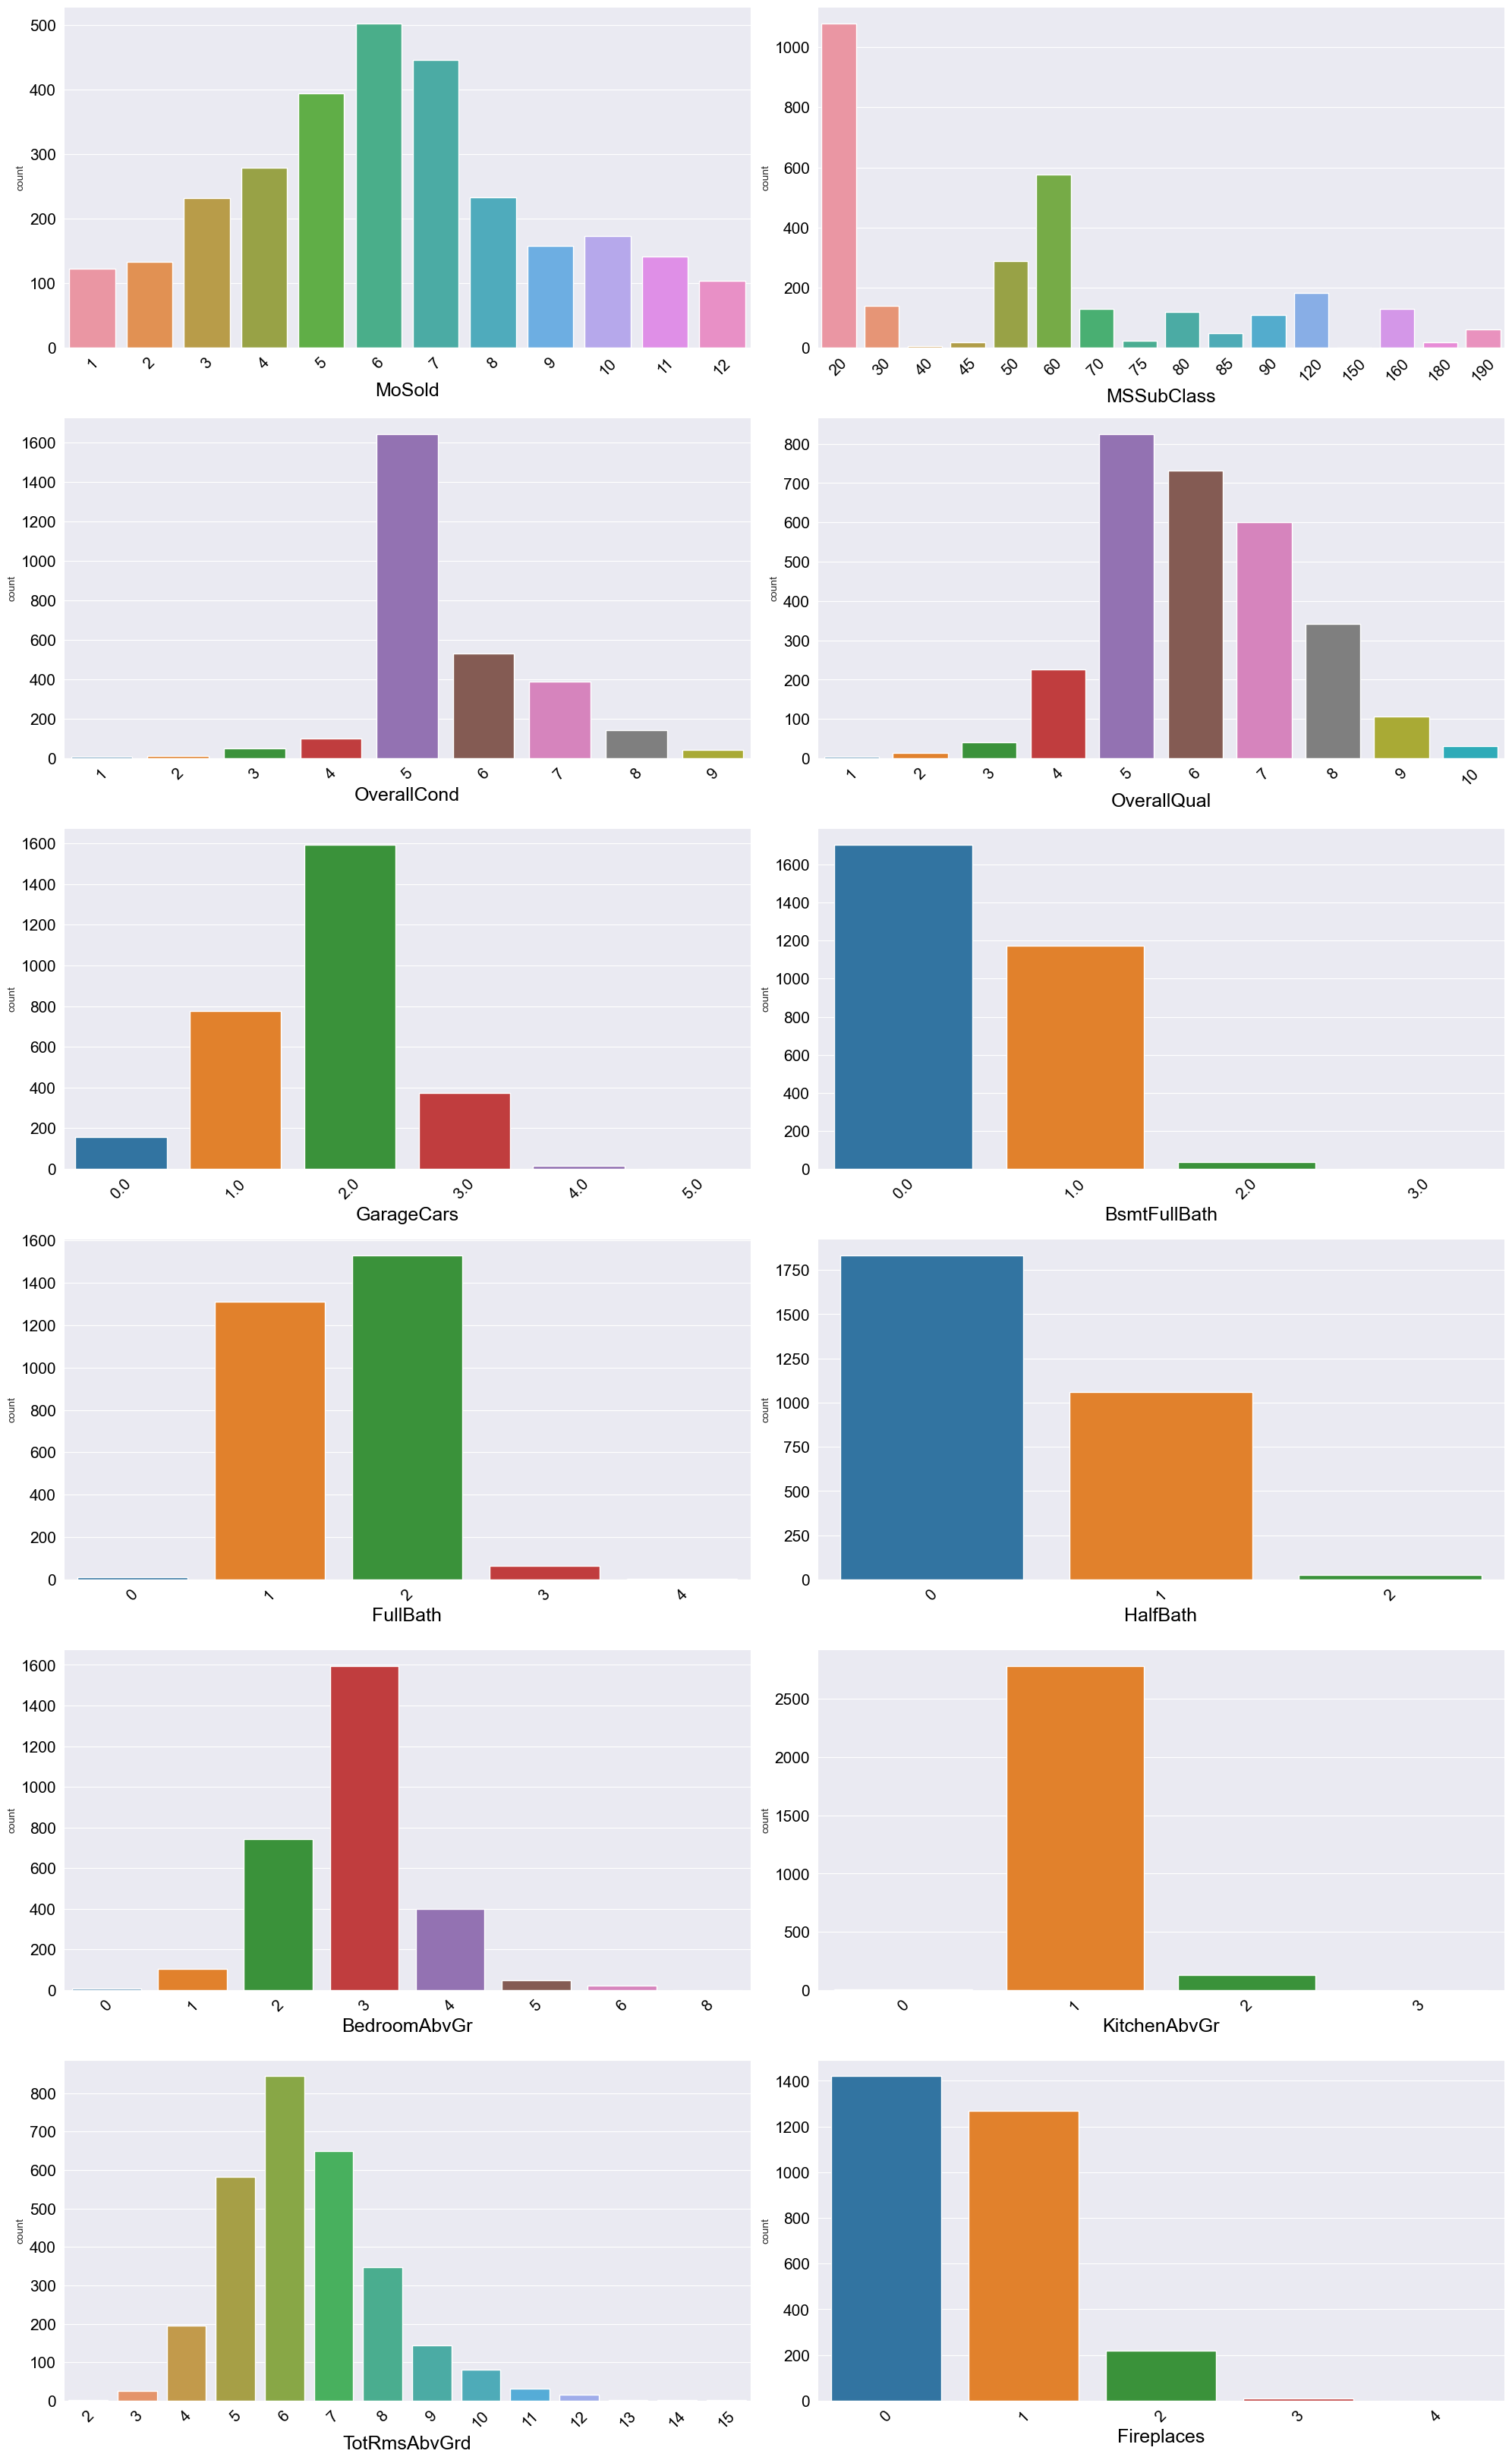

In [57]:
fig = plt.figure(figsize=(20,140))
for index,col in enumerate(num_but_cat.columns):
    plt.subplot(26,2,index+1)
    sns.countplot(x=num_but_cat.iloc[:,index], data=num_but_cat.dropna())
    plt.xlabel(col, fontsize = 18,color="black")

    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )

fig.tight_layout(pad=1.0)

In [58]:
#Creating new features
# Define a lambda function to map each month to its corresponding season
season_map = lambda x: "Winter" if x in [12, 1, 2] else \
                       "Spring" if x in [3, 4, 5] else \
                       "Summer" if x in [6, 7, 8] else \
                       "Fall" if x in [9, 10, 11] else None

# Apply the lambda function to create a new "season" column based on the "MoSold" column
train["sold_season"] = train["MoSold"].apply(season_map)

In [59]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
0   1          60       RL        65.00     8450  Absence      Reg   
1   2          20       RL        80.00     9600  Absence      Reg   
2   3          60       RL        68.00    11250  Absence      IR1   
3   4          70       RL        60.00     9550  Absence      IR1   
4   5          60       RL        84.00    14260  Absence      IR1   

  LandContour      LotConfig   Neighborhood Condition1 BldgType HouseStyle  \
0         Lvl         Inside        CollgCr       Norm     1Fam     2Story   
1         Lvl  rare_category  rare_category      Feedr     1Fam     1Story   
2         Lvl         Inside        CollgCr       Norm     1Fam     2Story   
3         Lvl         Corner  rare_category       Norm     1Fam     2Story   
4         Lvl  rare_category  rare_category       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st  \
0            7            5       2003          2003     Gable     VinylSd   
1            6            8       1976          1976     Gable     MetalSd   
2            7            5       2001          2002     Gable     VinylSd   
3            7            5       1915          1970     Gable     Wd Sdng   
4            8            5       2000          2000     Gable     VinylSd   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0        VinylSd    BrkFace      196.00        Gd        TA      PConc   
1        MetalSd        NaN        0.00        TA        TA     CBlock   
2        VinylSd    BrkFace      162.00        Gd        TA      PConc   
3  rare_category        NaN        0.00        TA        TA     BrkTil   
4        VinylSd    BrkFace      350.00        Gd        TA      PConc   

  BsmtQual       BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd             TA           No          GLQ      706.00          Unf   
1       Gd             TA           Gd          ALQ      978.00          Unf   
2       Gd             TA           Mn          GLQ      486.00          Unf   
3       TA  rare_category           No          ALQ      216.00          Unf   
4       Gd             TA           Av          GLQ      655.00          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir Electrical  \
0        0.00     150.00       856.00        Ex          Y      SBrkr   
1        0.00     284.00      1262.00        Ex          Y      SBrkr   
2        0.00     434.00       920.00        Ex          Y      SBrkr   
3        0.00     540.00       756.00        Gd          Y      SBrkr   
4        0.00     490.00      1145.00        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710          1.00         2         1   
1      1262         0       1262          0.00         2         0   
2       920       866       1786          1.00         2         1   
3       961       756       1717          1.00         1         0   
4      1145      1053       2198          1.00         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0     Absence     Attchd      2003.00          RFn        2.00   
1           1          TA     Attchd      1976.00          RFn        2.00   
2           1          TA     Attchd      2001.00          RFn        2.00   
3           1          Gd     Detchd      1998.00          Unf        3.00   
4           1          TA     Attchd      2000.

### 2.1.D. Time Features

In [60]:
#validating date data
year_data = train[['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']]
year_data.agg(['min','max'])

GarageYrBlt  YearBuilt  YearRemodAdd  YrSold
min      1895.00       1872          1950    2006
max      2207.00       2010          2010    2010

In [61]:
#There are 9 observations that year garage was built earlier than original construction date. Is it possible?
check = train[train['GarageYrBlt'] < train['YearBuilt']]
check['GarageYrBlt'] = check['GarageYrBlt'].astype('int')
check[['GarageYrBlt', 'YearBuilt']]

GarageYrBlt  YearBuilt
29           1920       1927
93           1900       1910
324          1961       1967
600          2003       2005
736          1949       1950
1103         1954       1959
1376         1925       1930
1414         1922       1923
1418         1962       1963
61           1956       1959
116          2009       2010
345          1920       1935
380          1960       1978
435          1940       1941
437          1926       1935
662          1925       1945
803          2005       2006
1049         2005       2006

In [62]:
##inconsistency
check_2 = train[train['YearRemodAdd'] < train['YearBuilt']]
check_2[['YearRemodAdd', 'YearBuilt']]

YearRemodAdd  YearBuilt
416          2001       2002

In [63]:
#removed the inconsistency row
train = train.drop(416)

In [64]:
#check again
check_2 = train[train['YearRemodAdd'] < train['YearBuilt']]
check_2[['YearRemodAdd', 'YearBuilt']]

Empty DataFrame
Columns: [YearRemodAdd, YearBuilt]
Index: []

In [65]:
#inconsistency
check_3 = train[train['YrSold'] < train['YearBuilt']]
check_3[['YrSold', 'YearBuilt']]

YrSold  YearBuilt
1089    2007       2008

In [66]:
#removed the inconsistence row
train = train.drop(1089)

In [67]:
#ok
check_3 = train[train['YrSold'] < train['YearBuilt']]
check_3[['YrSold', 'YearBuilt']]

Empty DataFrame
Columns: [YrSold, YearBuilt]
Index: []

In [68]:
#inconsistency
check_4 = train[train['GarageYrBlt'] > 2023]
check_4[['GarageYrBlt','YearRemodAdd', 'YearBuilt']]

GarageYrBlt  YearRemodAdd  YearBuilt
1132      2207.00          2007       2006

In [69]:
#removed the inconsistence row
train = train.drop(1132)

In [70]:
#ok
check_4 = train[train['GarageYrBlt'] > 2023]
check_4[['GarageYrBlt','YearRemodAdd', 'YearBuilt']]

Empty DataFrame
Columns: [GarageYrBlt, YearRemodAdd, YearBuilt]
Index: []

In [71]:
#it seems that years are same as construction date if no remodeling or additions. Thats why we have decided to remove YearBuilt column.
check_4 = train[train['YearRemodAdd'] == train['YearBuilt']]
check_4[['YearRemodAdd', 'YearBuilt']]

YearRemodAdd  YearBuilt
0             2003       2003
1             1976       1976
4             2000       2000
7             1973       1973
10            1965       1965
...            ...        ...
1452          1970       1970
1453          1970       1970
1454          1970       1970
1455          1970       1970
1457          1992       1992

[1558 rows x 2 columns]

In [72]:
#We have changed the year columns to age by extracting from today(year).
import datetime

today = datetime.date.today()

year = today.year

print(year)

2023


In [73]:
train['AgeBuilt'] = year - train['YearRemodAdd']

print(train['AgeBuilt'].head())


0    20
1    47
2    21
3    53
4    23
Name: AgeBuilt, dtype: int64


In [74]:
train['AgeSale'] = year - train['YrSold']

print(train['AgeSale'].head())


0    15
1    16
2    15
3    17
4    15
Name: AgeSale, dtype: int64


In [75]:
#We have changed the missing values with 2023 due to missing values mean that there is no garage before we calculate the age of the garage. (We want to set 0 age of garage.)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna('2023')

print(train['GarageYrBlt'].isnull().sum())


0


In [76]:
train['GarageYrBlt'] = train['GarageYrBlt'].astype(int)


In [77]:
train['AgeGarage'] = year - train['GarageYrBlt']


print(train['AgeGarage'].head())

0    20
1    47
2    22
3    25
4    23
Name: AgeGarage, dtype: int64


In [78]:
#removed the all year columns. (except YrSold due to there is possible to combine with month column)
train = train.drop(['YearBuilt','YearRemodAdd', 'GarageYrBlt','YrSold'], axis=1)

print(train.shape)


(2913, 71)


## 2.2 Correlation Analysis

In [80]:
#train.corr()

In [88]:
# #checked correlations
# plt.figure(figsize=(26,18))
# ax=sns.heatmap(train.corr(), cmap='Greens', annot=True)
# plt.show()

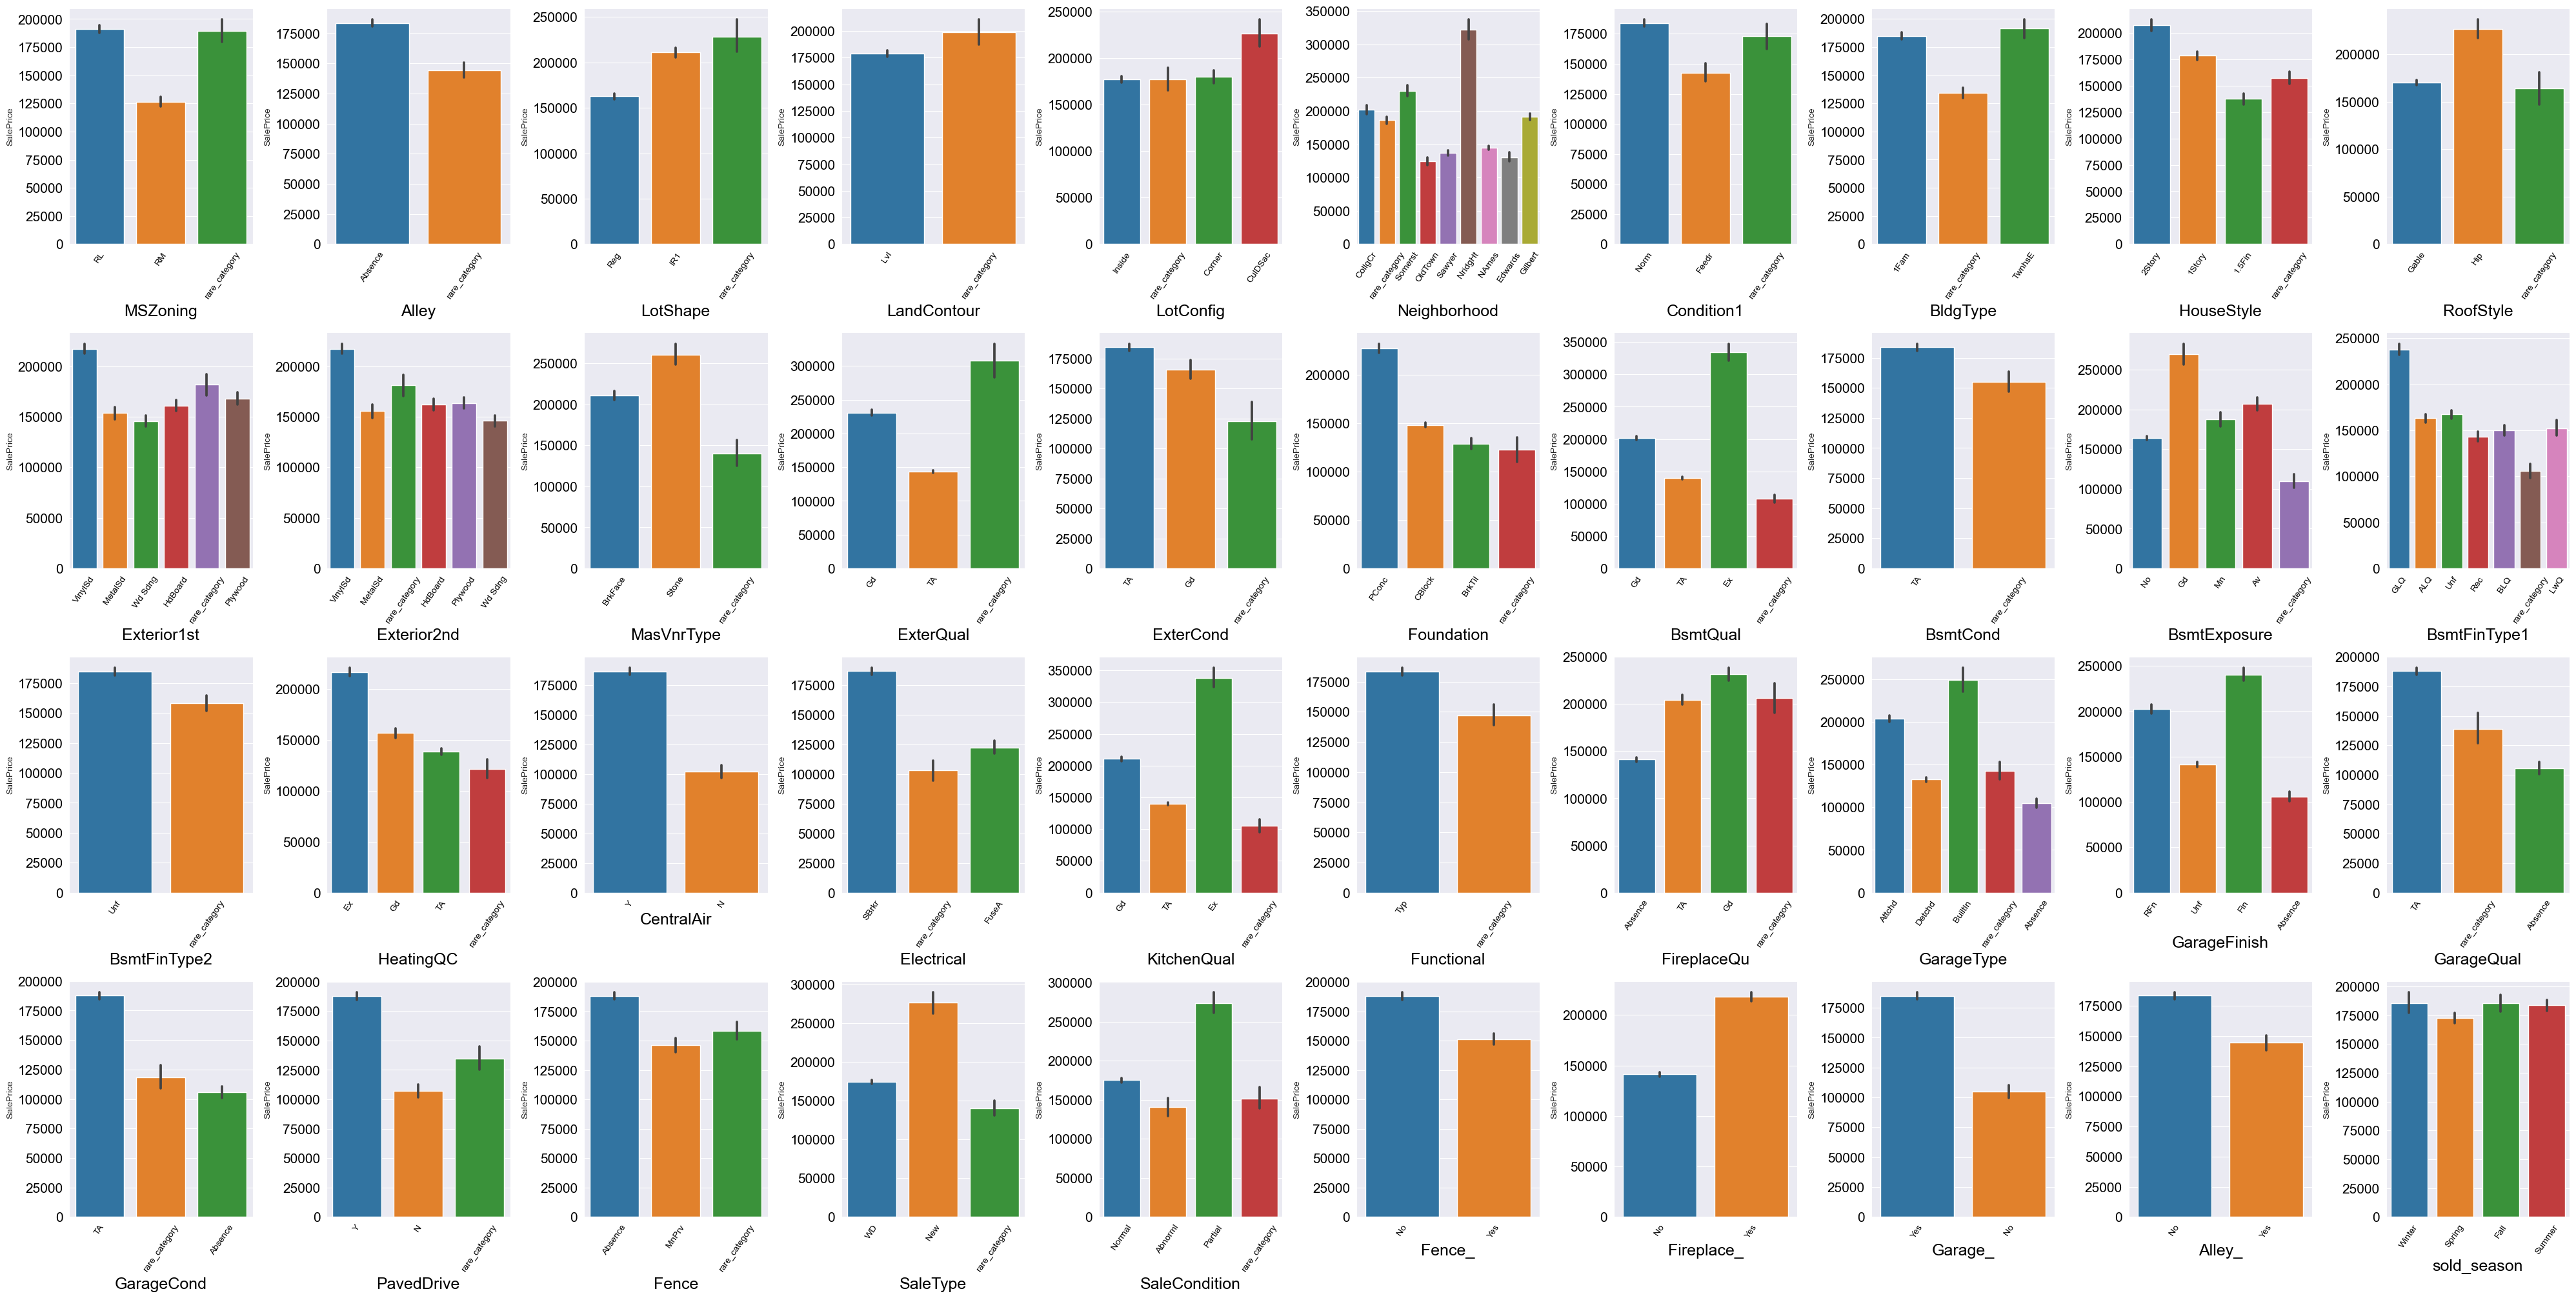

In [89]:
#Analysis of relationship between categorical variables and target variable
cat_3 = train.select_dtypes(include='object')
num_cols = cat_3.shape[1]  # get number of columns in cat_3

fig = plt.figure(figsize=(40, 5*num_cols))
for index,col in enumerate(cat_3.columns):
    plt.subplot(num_cols, 10, index+1)
    sns.barplot(x=cat_3[col], y=train['SalePrice'])
    plt.xlabel(col, fontsize=18, color="black")
    plt.xticks(size=10, color="black", rotation=55)
    plt.yticks(size=15, color="black")

fig.tight_layout(pad=1.0)

## 2.3 Feature Engineering

#### 2.3.A Missing Values

In [90]:
#checked missing values
null = pd.DataFrame(train.isnull().sum())
null = null.reset_index()
null = null.rename(columns={'index': 'Variables', 0:'Count'})
null['Proportion'] = null['Count']/len(train)
#checked only columns with null values
null_col = null[null['Count']>0].sort_values('Proportion', ascending=False)
null_col = null_col['Variables'].values

In [91]:
null[null['Count']>0].sort_values('Proportion', ascending=False)

Variables  Count  Proportion
18    MasVnrType   1763        0.61
3    LotFrontage    486        0.17
19    MasVnrArea     22        0.01
2       MSZoning      4        0.00
45    Functional      2        0.00
38  BsmtFullBath      2        0.00
34    Electrical      1        0.00
51    GarageArea      1        0.00
50    GarageCars      1        0.00
43   KitchenQual      1        0.00
30     BsmtUnfSF      1        0.00
31   TotalBsmtSF      1        0.00
29    BsmtFinSF2      1        0.00
27    BsmtFinSF1      1        0.00
17   Exterior2nd      1        0.00
16   Exterior1st      1        0.00
60      SaleType      1        0.00

In [92]:

train[null_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    1150 non-null   object 
 1   LotFrontage   2427 non-null   float64
 2   MasVnrArea    2891 non-null   float64
 3   MSZoning      2909 non-null   object 
 4   Functional    2911 non-null   object 
 5   BsmtFullBath  2911 non-null   float64
 6   Electrical    2912 non-null   object 
 7   GarageArea    2912 non-null   float64
 8   GarageCars    2912 non-null   float64
 9   KitchenQual   2912 non-null   object 
 10  BsmtUnfSF     2912 non-null   float64
 11  TotalBsmtSF   2912 non-null   float64
 12  BsmtFinSF2    2912 non-null   float64
 13  BsmtFinSF1    2912 non-null   float64
 14  Exterior2nd   2912 non-null   object 
 15  Exterior1st   2912 non-null   object 
 16  SaleType      2912 non-null   object 
dtypes: float64(9), object(8)
memory usage: 409.6+ KB


<Figure size 1000x600 with 0 Axes>

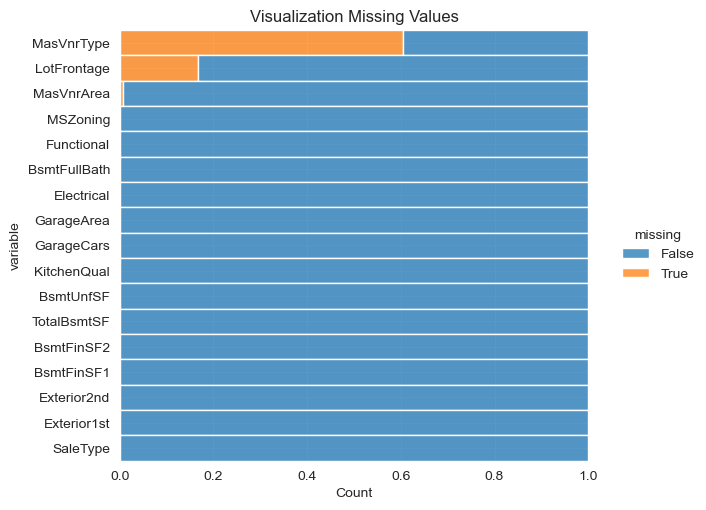

In [93]:
#first alternative categorical variables with null values
plt.figure(figsize=(10,6))
sns.displot(
    data=train[null_col].isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)
plt.title('Visualization Missing Values')
plt.show()

<Axes: >

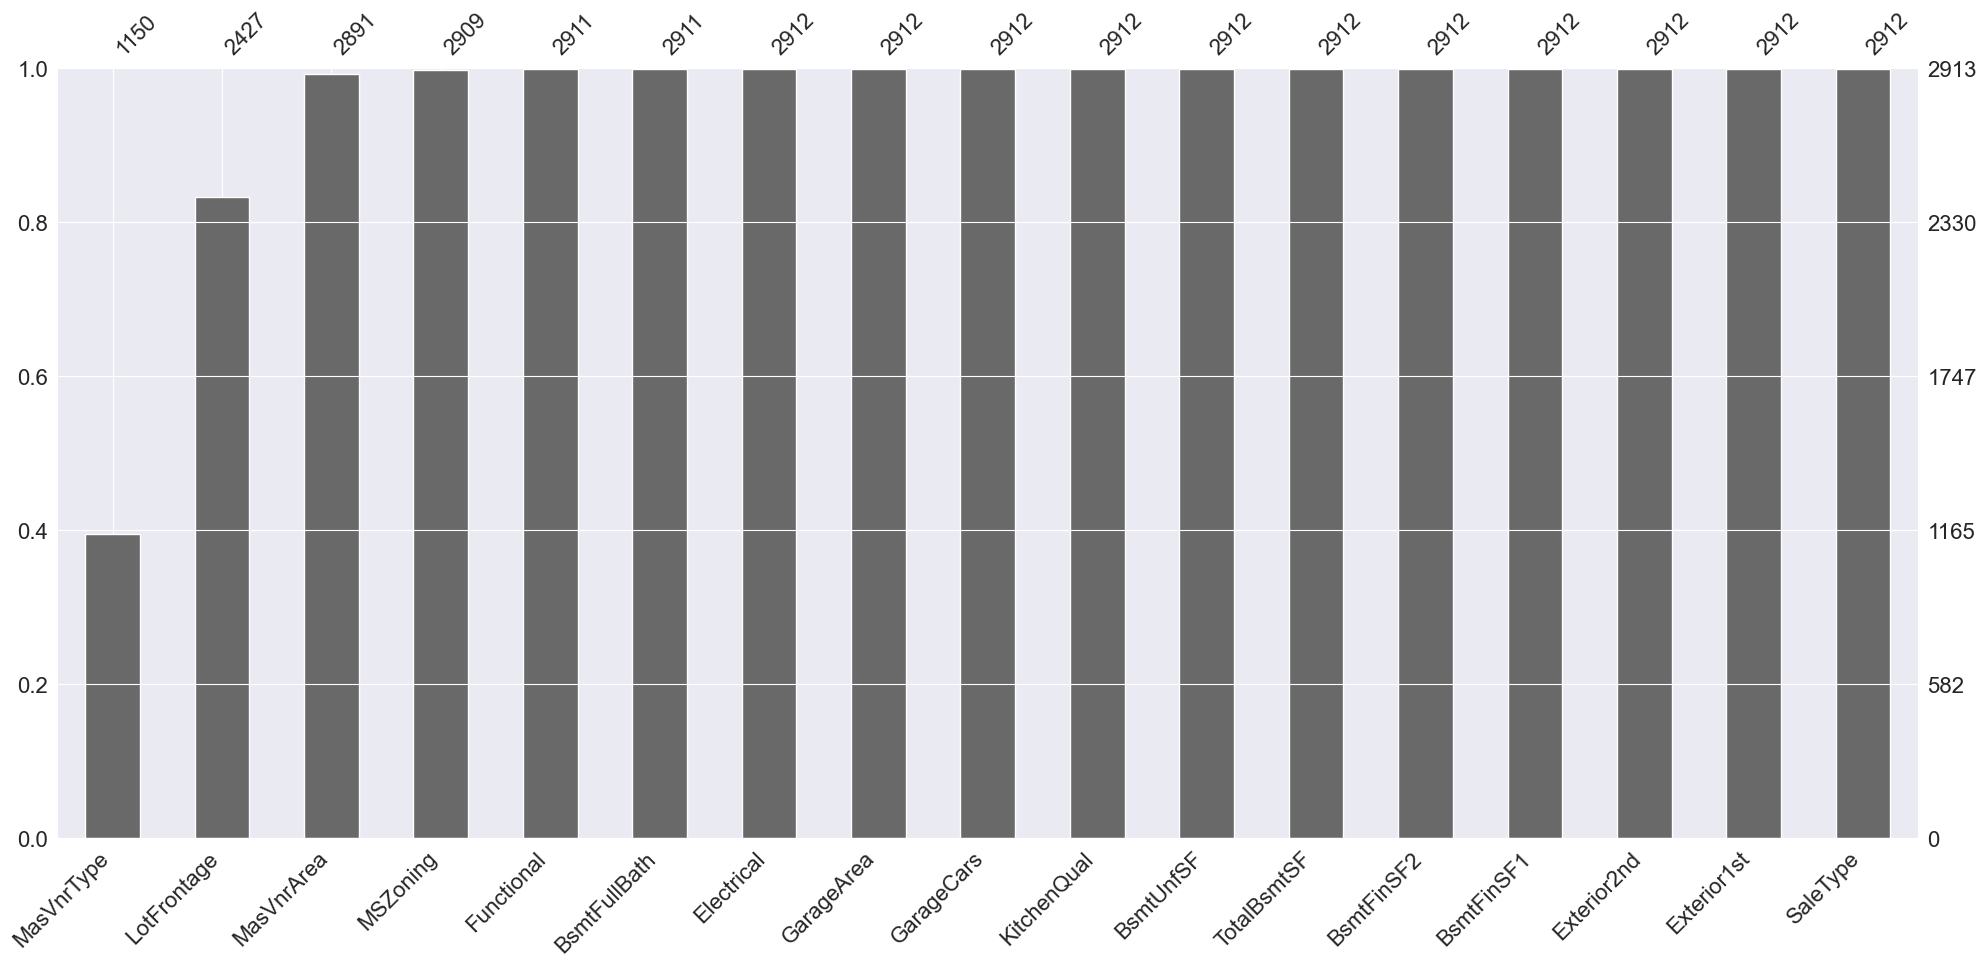

In [94]:
import missingno as msno
#Second alternative categorical variables with null values
msno.bar(train[null_col])

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

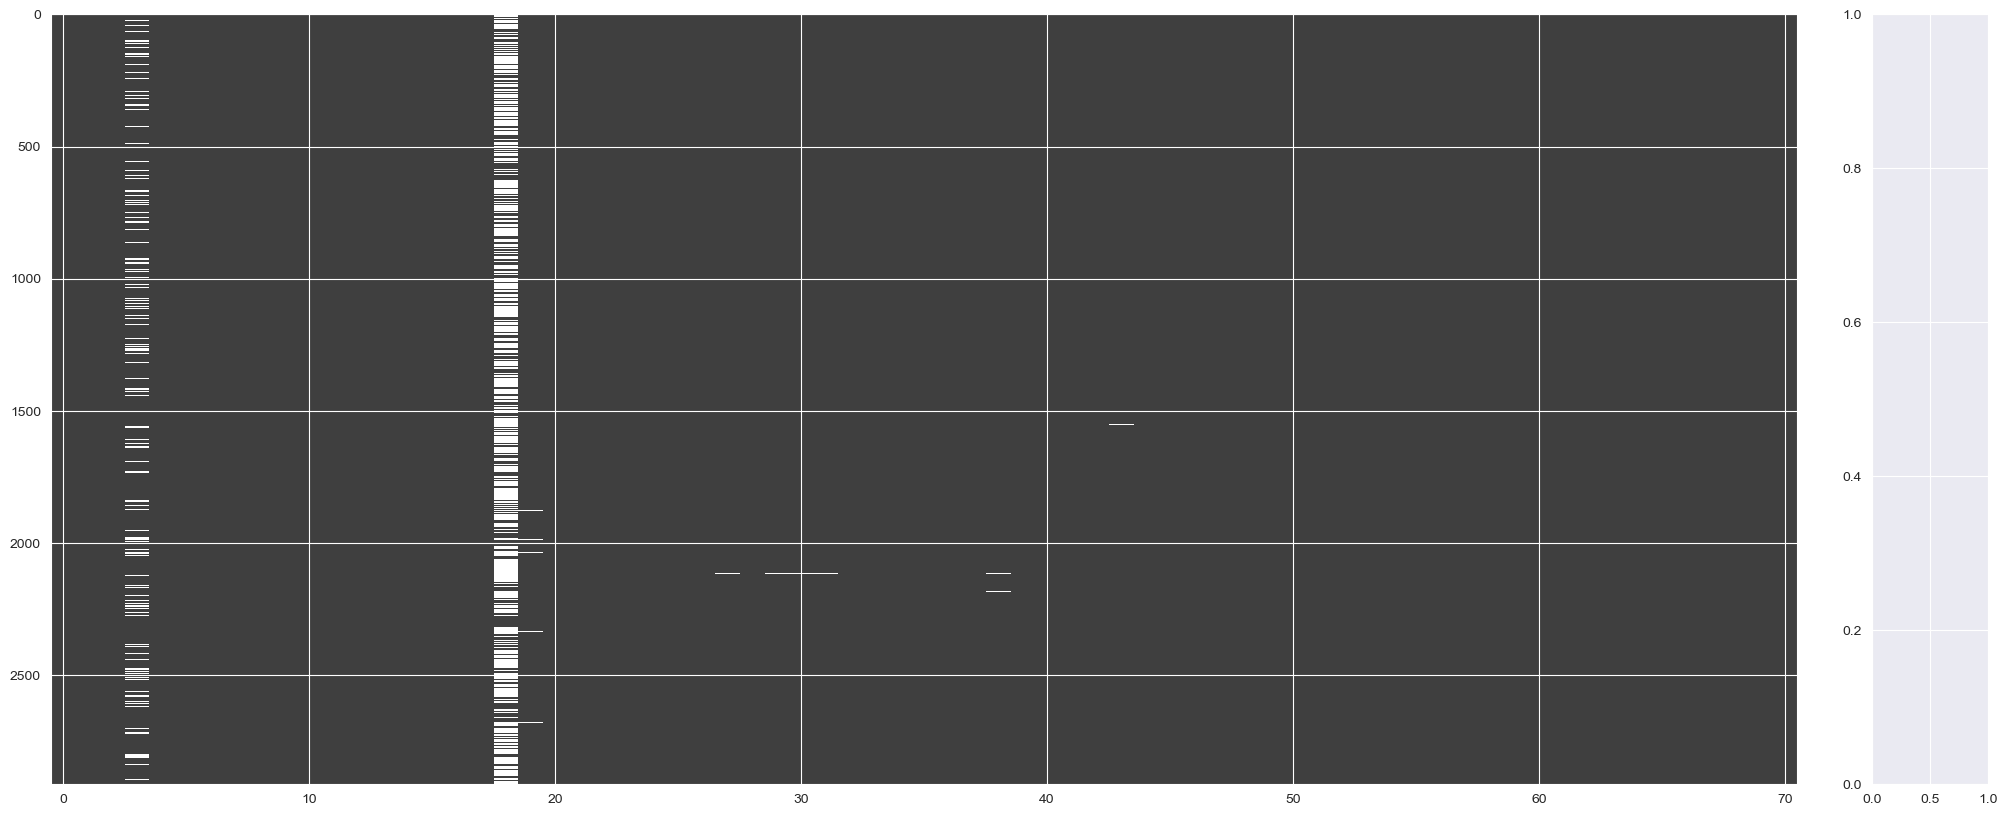

In [95]:
#checked whether missing values are at random.
msno.matrix(train)

<Axes: >

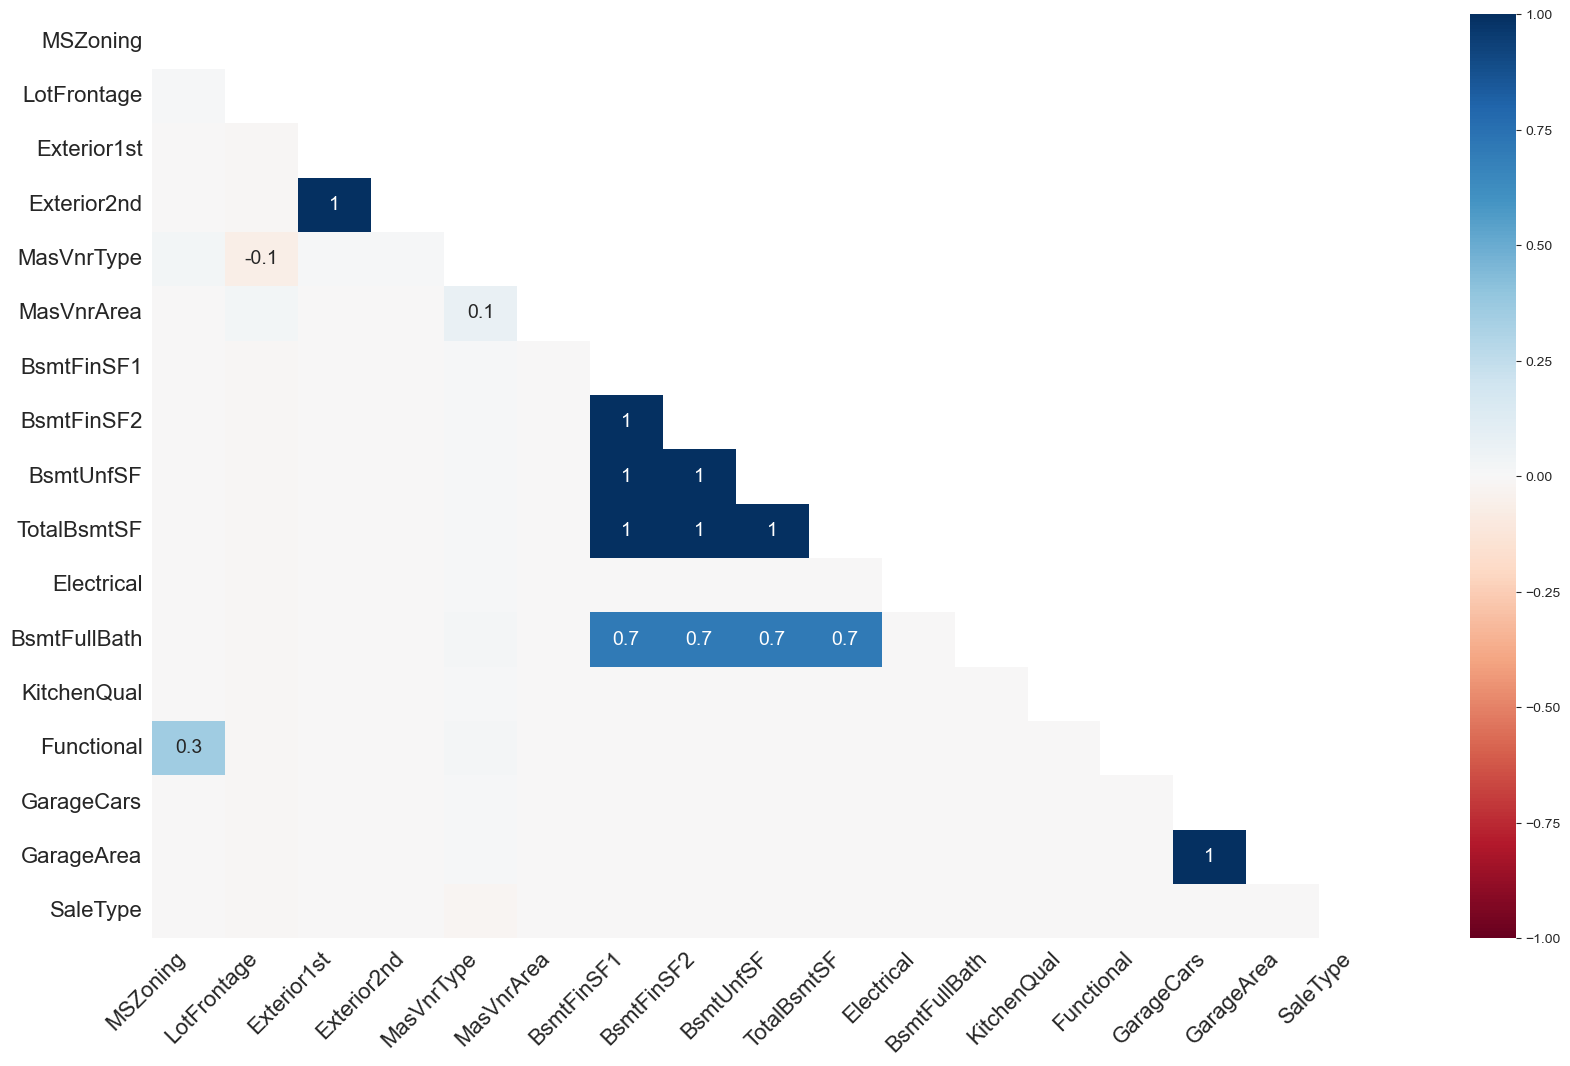

In [96]:
#Third alternative - shown graph of correlation of missing values between columns and explains the dependencies of missingness between columns
#https://medium.com/codex/how-to-identify-and-visualize-missing-values-with-python-3b304b06fe21
#the redder the color, the lower the correlation between missing values of the columns. The bluer it is, the higher the correlation of missingness.
#Close to -1: there is an anti-correlation between 2 columns: if column A has values, then column B has null values.
#Close to 0: no correlation due to the presence of null values between the columns
#Close to 1: strong correlation due to the presence of null values between the columns
msno.heatmap(train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'LotFrontage'),
  Text(1, 0, 'MasVnrArea'),
  Text(2, 0, 'BsmtFullBath'),
  Text(3, 0, 'GarageArea'),
  Text(4, 0, 'GarageCars'),
  Text(5, 0, 'BsmtUnfSF'),
  Text(6, 0, 'TotalBsmtSF'),
  Text(7, 0, 'BsmtFinSF2'),
  Text(8, 0, 'BsmtFinSF1')])

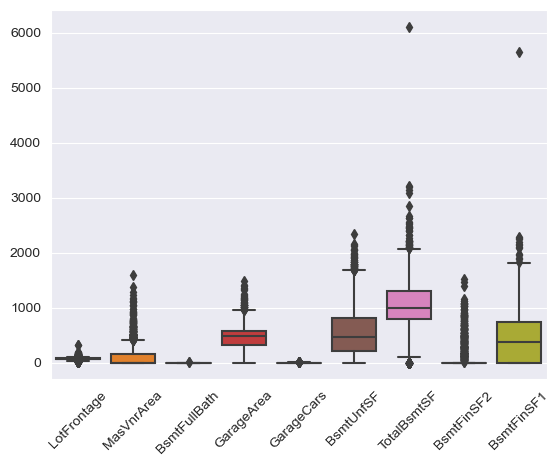

In [97]:
sns.boxplot(train[null_col])
plt.xticks(rotation=45)

In [98]:
train[null_col]

MasVnrType  LotFrontage  MasVnrArea MSZoning Functional  BsmtFullBath  \
0       BrkFace        65.00      196.00       RL        Typ          1.00   
1           NaN        80.00        0.00       RL        Typ          0.00   
2       BrkFace        68.00      162.00       RL        Typ          1.00   
3           NaN        60.00        0.00       RL        Typ          1.00   
4       BrkFace        84.00      350.00       RL        Typ          1.00   
...         ...          ...         ...      ...        ...           ...   
1454        NaN        21.00        0.00       RM        Typ          0.00   
1455        NaN        21.00        0.00       RM        Typ          0.00   
1456        NaN       160.00        0.00       RL        Typ          1.00   
1457        NaN        62.00        0.00       RL        Typ          0.00   
1458    BrkFace        74.00       94.00       RL        Typ          0.00   

     Electrical  GarageArea  GarageCars KitchenQual  BsmtUnfSF  TotalBsmtSF  \
0         SBrkr      548.00        2.00          Gd     150.00       856.00   
1         SBrkr      460.00        2.00          TA     284.00      1262.00   
2         SBrkr      608.00        2.00          Gd     434.00       920.00   
3         SBrkr      642.00        3.00          Gd     540.00       756.00   
4         SBrkr      836.00        3.00          Gd     490.00      1145.00   
...         ...         ...         ...         ...        ...          ...   
1454      SBrkr        0.00        0.00          TA     546.00       546.00   
1455      SBrkr      286.00        1.00          TA     294.00       546.00   
1456      SBrkr      576.00        2.00          TA       0.00      1224.00   
1457      SBrkr        0.00        0.00          TA     575.00       912.00   
1458      SBrkr      650.00        3.00          TA     238.00       996.00   

      BsmtFinSF2  BsmtFinSF1    Exterior2nd    Exterior1st SaleType  
0           0.00      706.00        VinylSd        VinylSd       WD  
1           0.00      978.00        MetalSd        MetalSd       WD  
2           0.00      486.00        VinylSd        VinylSd       WD  
3           0.00      216.00  rare_category        Wd Sdng       WD  
4           0.00      655.00        VinylSd        VinylSd       WD  
...          ...         ...            ...            ...      ...  
1454        0.00        0.00  rare_category  rare_category       WD  
1455        0.00      252.00  rare_category  rare_category       WD  
1456        0.00     1224.00        VinylSd        VinylSd       WD  
1457        0.00      337.00  rare_category        HdBoard       WD  
1458        0.00      758.00        HdBoard        HdBoard       WD  

[2913 rows x 17 columns]

In [99]:
train[null_col].describe().T

count    mean    std   min    25%    50%     75%     max
LotFrontage  2427.00   69.29  23.33 21.00  59.00  68.00   80.00  313.00
MasVnrArea   2891.00  101.86 178.24  0.00   0.00   0.00  164.00 1600.00
BsmtFullBath 2911.00    0.43   0.52  0.00   0.00   0.00    1.00    3.00
GarageArea   2912.00  472.67 215.17  0.00 320.00 480.00  576.00 1488.00
GarageCars   2912.00    1.77   0.76  0.00   1.00   2.00    2.00    5.00
BsmtUnfSF    2912.00  560.59 439.64  0.00 220.00 467.00  803.25 2336.00
TotalBsmtSF  2912.00 1050.17 434.58  0.00 793.00 988.00 1302.00 6110.00
BsmtFinSF2   2912.00   49.68 169.36  0.00   0.00   0.00    0.00 1526.00
BsmtFinSF1   2912.00  439.89 450.76  0.00   0.00 368.00  733.00 5644.00

In [100]:
train[null_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    1150 non-null   object 
 1   LotFrontage   2427 non-null   float64
 2   MasVnrArea    2891 non-null   float64
 3   MSZoning      2909 non-null   object 
 4   Functional    2911 non-null   object 
 5   BsmtFullBath  2911 non-null   float64
 6   Electrical    2912 non-null   object 
 7   GarageArea    2912 non-null   float64
 8   GarageCars    2912 non-null   float64
 9   KitchenQual   2912 non-null   object 
 10  BsmtUnfSF     2912 non-null   float64
 11  TotalBsmtSF   2912 non-null   float64
 12  BsmtFinSF2    2912 non-null   float64
 13  BsmtFinSF1    2912 non-null   float64
 14  Exterior2nd   2912 non-null   object 
 15  Exterior1st   2912 non-null   object 
 16  SaleType      2912 non-null   object 
dtypes: float64(9), object(8)
memory usage: 409.6+ KB


In [101]:
from sklearn.impute import SimpleImputer

# Get the list of numeric and categorical columns
num_cols = train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

# Impute the median for numeric columns and mode for categorical columns
imp_num = SimpleImputer(strategy='median')
imp_cat = SimpleImputer(strategy='most_frequent')

train[num_cols] = imp_num.fit_transform(train[num_cols])
train[cat_cols] = imp_cat.fit_transform(train[cat_cols])


In [102]:
train[null_col].describe().T

count    mean    std   min    25%    50%     75%     max
LotFrontage  2913.00   69.07  21.30 21.00  60.00  68.00   78.00  313.00
MasVnrArea   2913.00  101.09 177.78  0.00   0.00   0.00  163.00 1600.00
BsmtFullBath 2913.00    0.43   0.52  0.00   0.00   0.00    1.00    3.00
GarageArea   2913.00  472.67 215.14  0.00 320.00 480.00  576.00 1488.00
GarageCars   2913.00    1.77   0.76  0.00   1.00   2.00    2.00    5.00
BsmtUnfSF    2913.00  560.56 439.56  0.00 220.00 467.00  803.00 2336.00
TotalBsmtSF  2913.00 1050.15 434.51  0.00 793.00 988.00 1302.00 6110.00
BsmtFinSF2   2913.00   49.67 169.34  0.00   0.00   0.00    0.00 1526.00
BsmtFinSF1   2913.00  439.87 450.69  0.00   0.00 368.00  733.00 5644.00

In [103]:
#!pip install impyute
#from impyute.imputation.cs import mice

# Define features to be used for imputing missing values
#features = one_hot_train.drop(['Id','SalePrice'], axis=1).columns.tolist()

# Apply MICE algorithm for imputing missing values
#imputed_arr = mice(one_hot_train[features].values)
#imputed_df = pd.DataFrame(imputed_arr, columns=features)





In [104]:
print(train.shape)


(2913, 71)


In [105]:
#checked missing values
null = pd.DataFrame(train.isnull().sum())
null = null.reset_index()
null = null.rename(columns={'index': 'Variables', 0:'Count'})
null['Proportion'] = null['Count']/len(train)
#checked only columns with null values
null[null['Count']>0].sort_values('Proportion', ascending=False)


Empty DataFrame
Columns: [Variables, Count, Proportion]
Index: []

#### 2.3.B Outliers

In [106]:
num_cols = train.select_dtypes(exclude='object')
num_cols

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0       1.00       60.00        65.00  8450.00         7.00         5.00   
1       2.00       20.00        80.00  9600.00         6.00         8.00   
2       3.00       60.00        68.00 11250.00         7.00         5.00   
3       4.00       70.00        60.00  9550.00         7.00         5.00   
4       5.00       60.00        84.00 14260.00         8.00         5.00   
...      ...         ...          ...      ...          ...          ...   
1454 2915.00      160.00        21.00  1936.00         4.00         7.00   
1455 2916.00      160.00        21.00  1894.00         4.00         5.00   
1456 2917.00       20.00       160.00 20000.00         5.00         7.00   
1457 2918.00       85.00        62.00 10441.00         5.00         5.00   
1458 2919.00       60.00        74.00  9627.00         7.00         5.00   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0         196.00      706.00        0.00     150.00       856.00    856.00   
1           0.00      978.00        0.00     284.00      1262.00   1262.00   
2         162.00      486.00        0.00     434.00       920.00    920.00   
3           0.00      216.00        0.00     540.00       756.00    961.00   
4         350.00      655.00        0.00     490.00      1145.00   1145.00   
...          ...         ...         ...        ...          ...       ...   
1454        0.00        0.00        0.00     546.00       546.00    546.00   
1455        0.00      252.00        0.00     294.00       546.00    546.00   
1456        0.00     1224.00        0.00       0.00      1224.00   1224.00   
1457        0.00      337.00        0.00     575.00       912.00    970.00   
1458       94.00      758.00        0.00     238.00       996.00    996.00   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854.00    1710.00          1.00      2.00      1.00          3.00   
1         0.00    1262.00          0.00      2.00      0.00          3.00   
2       866.00    1786.00          1.00      2.00      1.00          3.00   
3       756.00    1717.00          1.00      1.00      0.00          3.00   
4      1053.00    2198.00          1.00      2.00      1.00          4.00   
...        ...        ...           ...       ...       ...           ...   
1454    546.00    1092.00          0.00      1.00      1.00          3.00   
1455    546.00    1092.00          0.00      1.00      1.00          3.00   
1456      0.00    1224.00          1.00      1.00      0.00          4.00   
1457      0.00     970.00          0.00      1.00      0.00          3.00   
1458   1004.00    2000.00          0.00      2.00      1.00          3.00   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
0             1.00          8.00        0.00        2.00      548.00   
1             1.00          6.00        1.00        2.00      460.00   
2             1.00          6.00        1.00        2.00      608.00   
3             1.00          7.00        1.00        3.00      642.00   
4             1.00          9.00        1.00        3.00      836.00   
...            ...           ...         ...         ...         ...   
1454          1.00          5.00        0.00        0.00        0.00   
1455          1.00          6.00        0.00        1.00      286.00   
1456          1.00          7.00        1.00        2.00      576.00   
1457          1.00          6.00        0.00        0.00        0.00   
1458          1.00          9.00        1.00        3.00      650.00   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  MoSold  SalePrice  AgeBuilt  \
0           0.00        61.00           0.00    2.00  208500.00     20.00   
1         298.00         0.00           0.00    5.00  181500.00     47.00   
2           0.00        42.00           0.00    9.00  223500.00     21.00   
3           0.00        35.00         272.00    2.00  140000.0

In [107]:
num_cols.describe().T

count      mean      std      min       25%       50%  \
Id            2913.00   1459.69   842.84     1.00    730.00   1460.00   
MSSubClass    2913.00     57.15    42.53    20.00     20.00     50.00   
LotFrontage   2913.00     69.07    21.30    21.00     60.00     68.00   
LotArea       2913.00  10161.81  7875.42  1300.00   7476.00   9453.00   
OverallQual   2913.00      6.09     1.41     1.00      5.00      6.00   
OverallCond   2913.00      5.57     1.11     1.00      5.00      5.00   
MasVnrArea    2913.00    101.09   177.78     0.00      0.00      0.00   
BsmtFinSF1    2913.00    439.87   450.69     0.00      0.00    368.00   
BsmtFinSF2    2913.00     49.67   169.34     0.00      0.00      0.00   
BsmtUnfSF     2913.00    560.56   439.56     0.00    220.00    467.00   
TotalBsmtSF   2913.00   1050.15   434.51     0.00    793.00    988.00   
1stFlrSF      2913.00   1158.13   385.72   334.00    876.00   1082.00   
2ndFlrSF      2913.00    336.57   428.71     0.00      0.00      0.00   
GrLivArea     2913.00   1499.40   501.97   334.00   1125.00   1444.00   
BsmtFullBath  2913.00      0.43     0.52     0.00      0.00      0.00   
FullBath      2913.00      1.57     0.55     0.00      1.00      2.00   
HalfBath      2913.00      0.38     0.50     0.00      0.00      0.00   
BedroomAbvGr  2913.00      2.86     0.82     0.00      2.00      3.00   
KitchenAbvGr  2913.00      1.04     0.21     0.00      1.00      1.00   
TotRmsAbvGrd  2913.00      6.45     1.56     2.00      5.00      6.00   
Fireplaces    2913.00      0.60     0.65     0.00      0.00      1.00   
GarageCars    2913.00      1.77     0.76     0.00      1.00      2.00   
GarageArea    2913.00    472.67   215.14     0.00    320.00    480.00   
WoodDeckSF    2913.00     93.62   126.34     0.00      0.00      0.00   
OpenPorchSF   2913.00     47.36    67.14     0.00      0.00     26.00   
EnclosedPorch 2913.00     23.15    64.30     0.00      0.00      0.00   
MoSold        2913.00      6.21     2.71     1.00      4.00      6.00   
SalePrice     2913.00 180695.69 80024.35 12789.00 129250.00 160000.00   
AgeBuilt      2913.00     38.75    20.89    13.00     19.00     30.00   
AgeSale       2913.00     15.21     1.32    13.00     14.00     15.00   
AgeGarage     2913.00     42.53    26.54     0.00     20.00     39.00   

                    75%       max  
Id              2189.00   2919.00  
MSSubClass        70.00    190.00  
LotFrontage       78.00    313.00  
LotArea        11577.00 215245.00  
OverallQual        7.00     10.00  
OverallCond        6.00      9.00  
MasVnrArea       163.00   1600.00  
BsmtFinSF1       733.00   5644.00  
BsmtFinSF2         0.00   1526.00  
BsmtUnfSF        803.00   2336.00  
TotalBsmtSF     1302.00   6110.00  
1stFlrSF        1384.00   4692.00  
2ndFlrSF         704.00   2065.00  
GrLivArea       1743.00   5642.00  
BsmtFullBath       1.00      3.00  
FullBath           2.00      4.00  
HalfBath           1.00      2.00  
BedroomAbvGr       3.00      8.00  
KitchenAbvGr       1.00      3.00  
TotRmsAbvGrd       7.00     14.00  
Fireplaces         1.00      4.00  
GarageCars         2.00      5.00  
GarageArea       576.00   1488.00  
WoodDeckSF       168.00   1424.00  
OpenPorchSF       70.00    742.00  
EnclosedPorch      0.00   1012.00  
MoSold             8.00     12.00  
SalePrice     213500.00 755000.00  
AgeBuilt          58.00     73.00  
AgeSale           16.00     17.00  
AgeGarage         62.00    128.00

In [108]:
num_cols_original = num_cols.drop(['Id','MSSubClass','OverallQual','OverallCond','BsmtFullBath','FullBath',
                        'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold'], axis=1)


In [109]:
num_cols_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2913 non-null   float64
 1   LotArea        2913 non-null   float64
 2   MasVnrArea     2913 non-null   float64
 3   BsmtFinSF1     2913 non-null   float64
 4   BsmtFinSF2     2913 non-null   float64
 5   BsmtUnfSF      2913 non-null   float64
 6   TotalBsmtSF    2913 non-null   float64
 7   1stFlrSF       2913 non-null   float64
 8   2ndFlrSF       2913 non-null   float64
 9   GrLivArea      2913 non-null   float64
 10  GarageArea     2913 non-null   float64
 11  WoodDeckSF     2913 non-null   float64
 12  OpenPorchSF    2913 non-null   float64
 13  EnclosedPorch  2913 non-null   float64
 14  SalePrice      2913 non-null   float64
 15  AgeBuilt       2913 non-null   float64
 16  AgeSale        2913 non-null   float64
 17  AgeGarage      2913 non-null   float64
dtypes: float64(18

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'LotFrontage'),
  Text(1, 0, 'LotArea'),
  Text(2, 0, 'MasVnrArea'),
  Text(3, 0, 'BsmtFinSF1'),
  Text(4, 0, 'BsmtFinSF2'),
  Text(5, 0, 'BsmtUnfSF'),
  Text(6, 0, 'TotalBsmtSF'),
  Text(7, 0, '1stFlrSF'),
  Text(8, 0, '2ndFlrSF'),
  Text(9, 0, 'GrLivArea'),
  Text(10, 0, 'GarageArea'),
  Text(11, 0, 'WoodDeckSF'),
  Text(12, 0, 'OpenPorchSF'),
  Text(13, 0, 'EnclosedPorch'),
  Text(14, 0, 'SalePrice'),
  Text(15, 0, 'AgeBuilt'),
  Text(16, 0, 'AgeSale'),
  Text(17, 0, 'AgeGarage')])

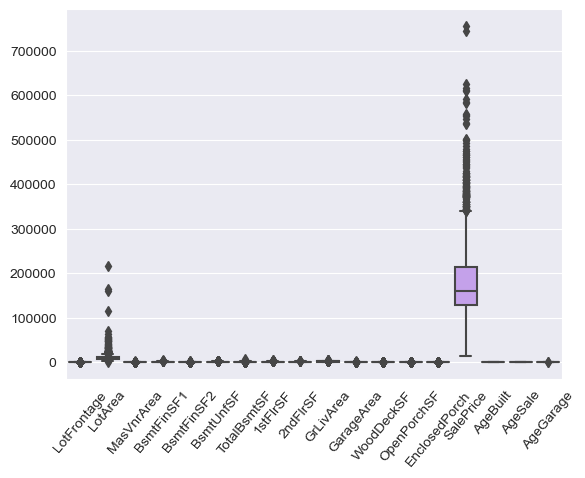

In [110]:
sns.boxplot(num_cols_original)
plt.xticks(rotation=50)

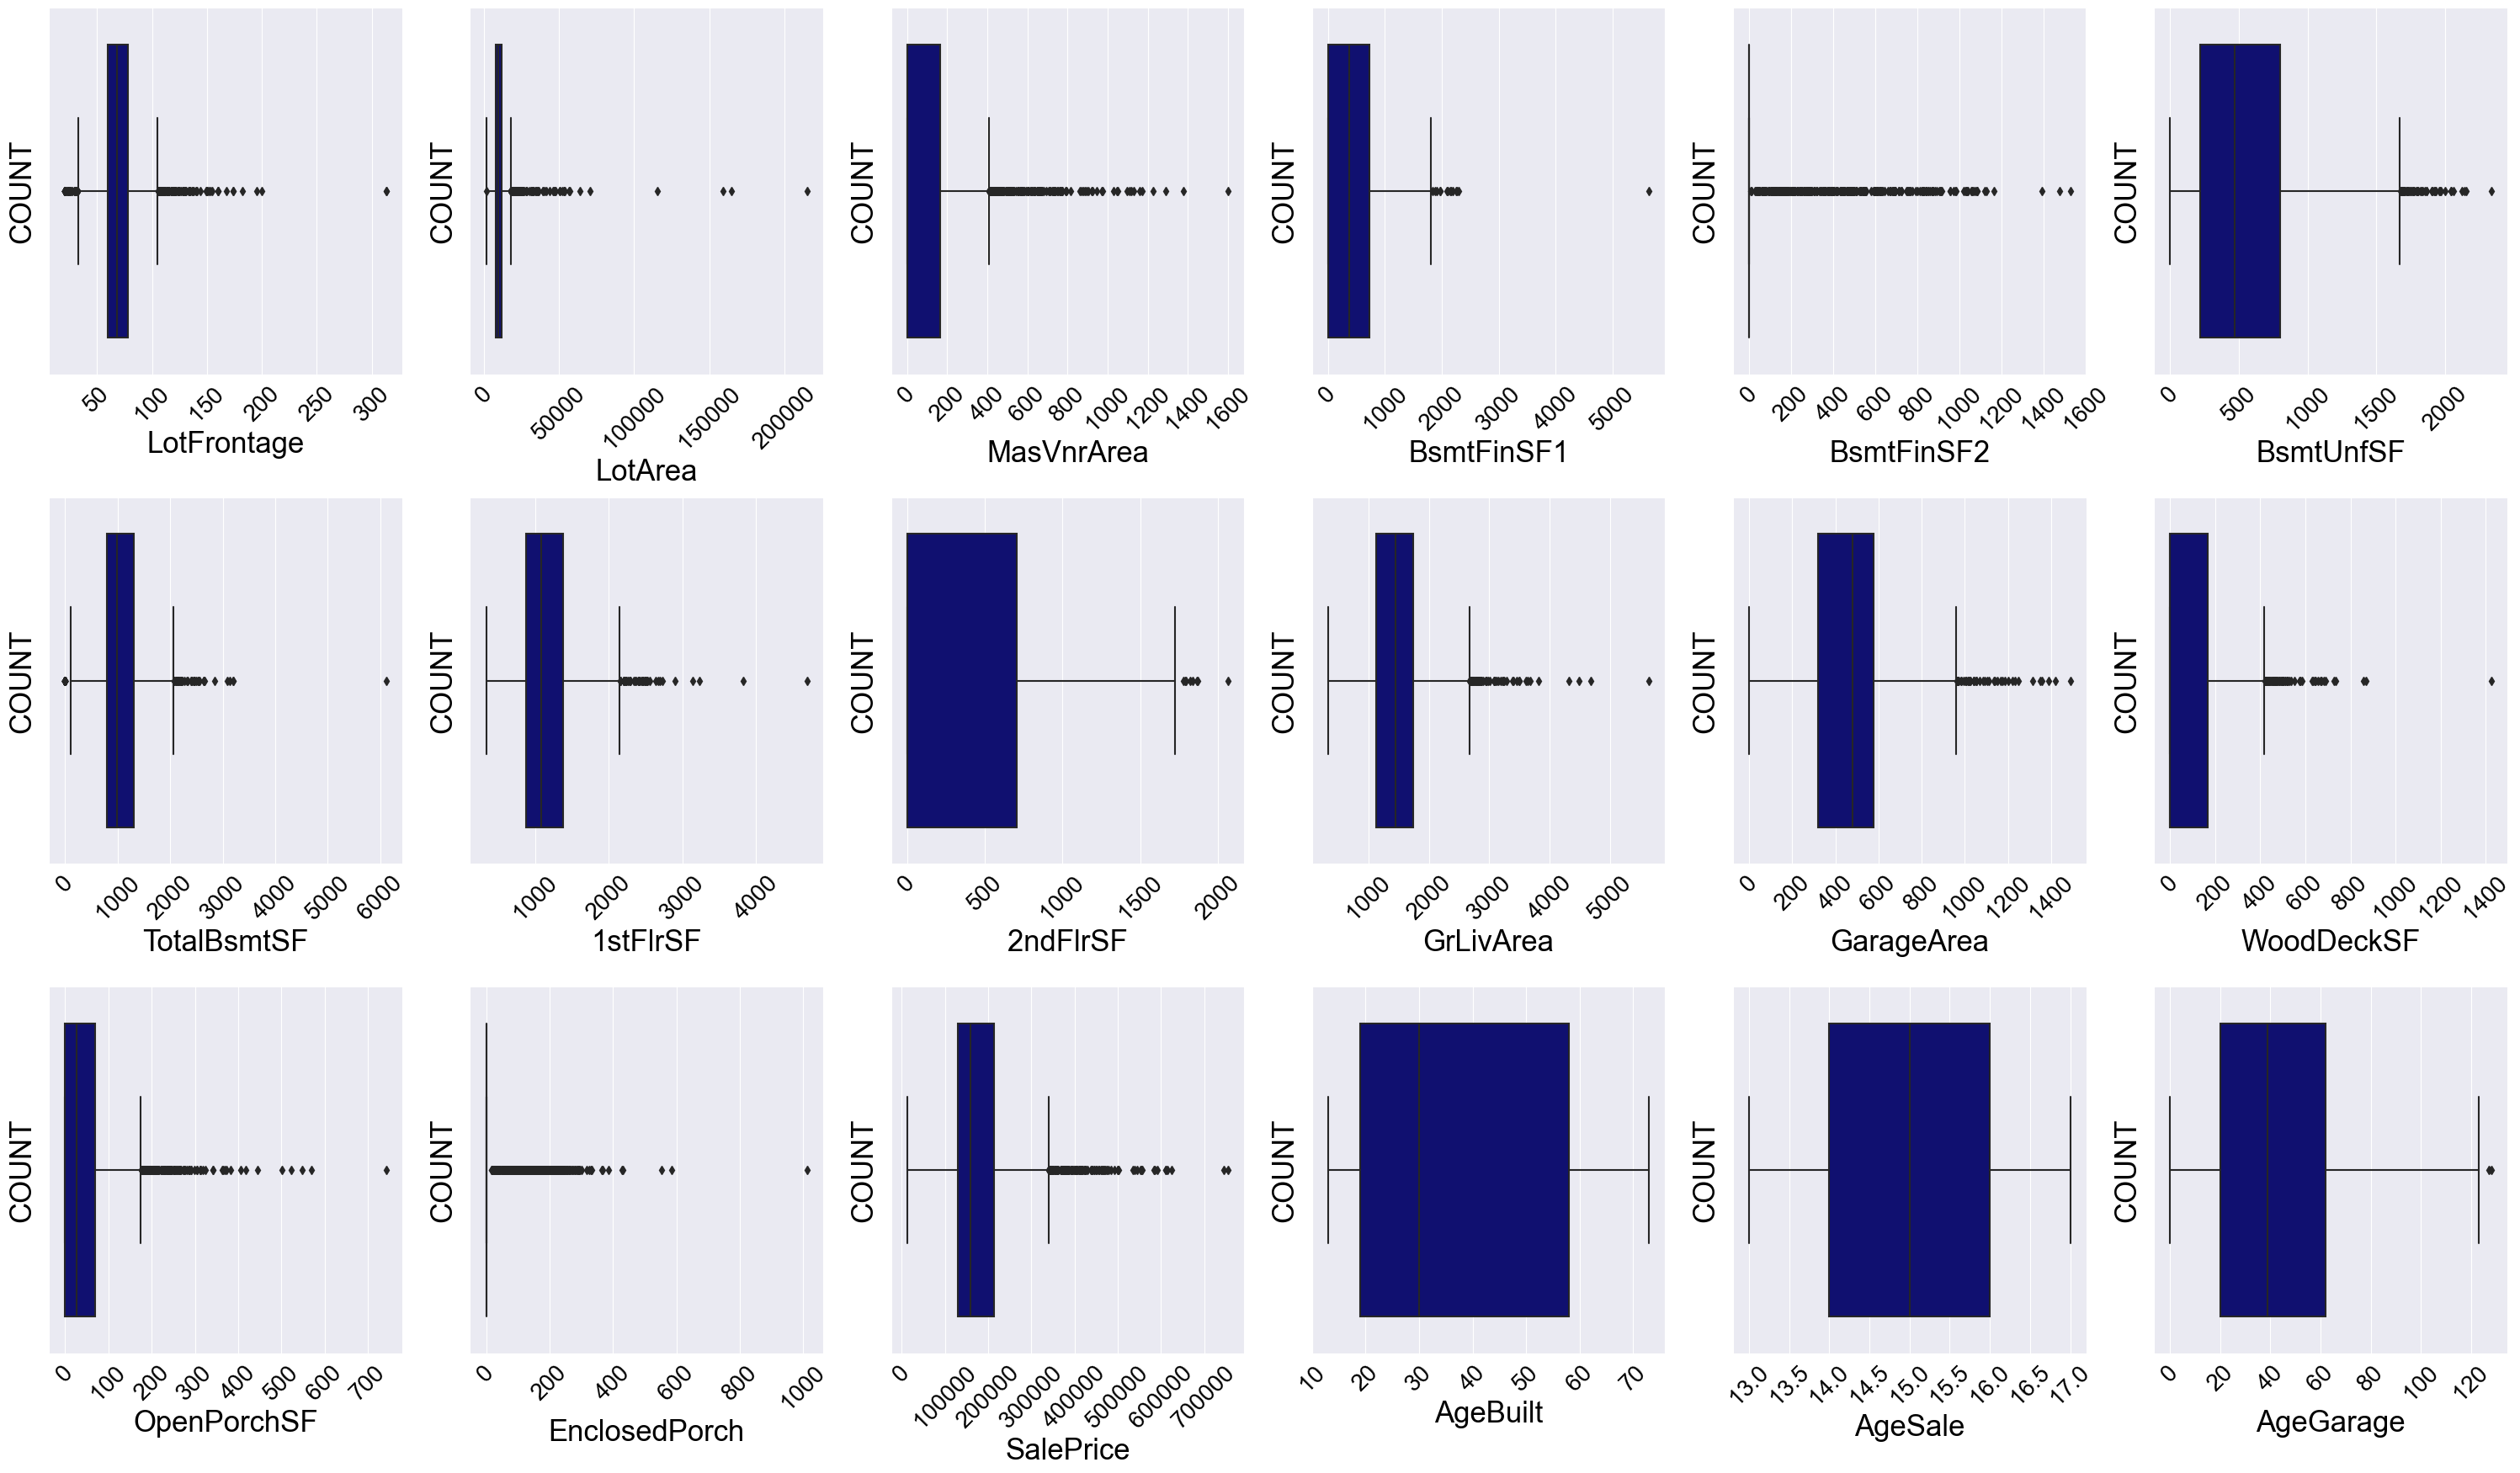

In [111]:
fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_cols_original):
    plt.subplot(26,6,index+1)
    sns.boxplot(x=col, data=num_cols_original.dropna(), color='navy')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

In [112]:
num_cols_original

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0           65.00  8450.00      196.00      706.00        0.00     150.00   
1           80.00  9600.00        0.00      978.00        0.00     284.00   
2           68.00 11250.00      162.00      486.00        0.00     434.00   
3           60.00  9550.00        0.00      216.00        0.00     540.00   
4           84.00 14260.00      350.00      655.00        0.00     490.00   
...           ...      ...         ...         ...         ...        ...   
1454        21.00  1936.00        0.00        0.00        0.00     546.00   
1455        21.00  1894.00        0.00      252.00        0.00     294.00   
1456       160.00 20000.00        0.00     1224.00        0.00       0.00   
1457        62.00 10441.00        0.00      337.00        0.00     575.00   
1458        74.00  9627.00       94.00      758.00        0.00     238.00   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856.00    856.00    854.00    1710.00      548.00        0.00   
1         1262.00   1262.00      0.00    1262.00      460.00      298.00   
2          920.00    920.00    866.00    1786.00      608.00        0.00   
3          756.00    961.00    756.00    1717.00      642.00        0.00   
4         1145.00   1145.00   1053.00    2198.00      836.00      192.00   
...           ...       ...       ...        ...         ...         ...   
1454       546.00    546.00    546.00    1092.00        0.00        0.00   
1455       546.00    546.00    546.00    1092.00      286.00        0.00   
1456      1224.00   1224.00      0.00    1224.00      576.00      474.00   
1457       912.00    970.00      0.00     970.00        0.00       80.00   
1458       996.00    996.00   1004.00    2000.00      650.00      190.00   

      OpenPorchSF  EnclosedPorch  SalePrice  AgeBuilt  AgeSale  AgeGarage  
0           61.00           0.00  208500.00     20.00    15.00      20.00  
1            0.00           0.00  181500.00     47.00    16.00      47.00  
2           42.00           0.00  223500.00     21.00    15.00      22.00  
3           35.00         272.00  140000.00     53.00    17.00      25.00  
4           84.00           0.00  250000.00     23.00    15.00      23.00  
...           ...            ...        ...       ...      ...        ...  
1454         0.00           0.00   90500.00     53.00    17.00       0.00  
1455        24.00           0.00   71000.00     53.00    17.00      53.00  
1456         0.00           0.00  131000.00     27.00    17.00      63.00  
1457        32.00           0.00  132000.00     31.00    17.00       0.00  
1458        48.00           0.00  188000.00     29.00    17.00      30.00  

[2913 rows x 18 columns]

In [113]:
#def adjusted_quartiles(col):
#    median = np.median(col)
#   mad = np.median(np.abs(col - median))
 #   q1 = np.median(col[col <= median - 1.5 * mad])
  #  q3 = np.median(col[col >= median + 1.5 * mad])
   # return q1, q3

#def outlier_thresholds(dataframe, col_name):
#    q1, q3 = adjusted_quartiles(dataframe[col_name])
 #   quartile1 = q1
  #  quartile3 = q3
   # interquantile_range = quartile3 - quartile1
   # up_limit = quartile3 + 1.5 * interquantile_range
    #low_limit = quartile1 - 1.5 * interquantile_range
    #return low_limit, up_limit

#for col in num_cols_original.iloc[:,1:].columns:
 #   print(col, outlier_thresholds(train, col))


In [114]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


for col in num_cols_original.columns:
    print(col, outlier_thresholds(train, col))

LotFrontage (33.0, 105.0)
LotArea (1324.5, 17728.5)
MasVnrArea (-244.5, 407.5)
BsmtFinSF1 (-1099.5, 1832.5)
BsmtFinSF2 (0.0, 0.0)
BsmtUnfSF (-654.5, 1677.5)
TotalBsmtSF (29.5, 2065.5)
1stFlrSF (114.0, 2146.0)
2ndFlrSF (-1056.0, 1760.0)
GrLivArea (198.0, 2670.0)
GarageArea (-64.0, 960.0)
WoodDeckSF (-252.0, 420.0)
OpenPorchSF (-105.0, 175.0)
EnclosedPorch (0.0, 0.0)
SalePrice (2875.0, 339875.0)
AgeBuilt (-39.5, 116.5)
AgeSale (11.0, 19.0)
AgeGarage (-43.0, 125.0)


In [115]:
# With the x function, we can confirm the existence of outliers in our variables.

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False



for col in num_cols_original:
    print(col, check_outlier(train, col))

LotFrontage True
LotArea True
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF True
TotalBsmtSF True
1stFlrSF True
2ndFlrSF True
GrLivArea True
GarageArea True
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
SalePrice True
AgeBuilt False
AgeSale False
AgeGarage True


In [116]:
# We suppress our outliers with the 'replace_with_thresholds' function.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols_original:
    replace_with_thresholds(train, col)

# When we check for outliers with the y function, we observe the result.
for col in num_cols_original:
    print(col, check_outlier(train, col))

LotFrontage False
LotArea False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
GrLivArea False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
SalePrice False
AgeBuilt False
AgeSale False
AgeGarage False


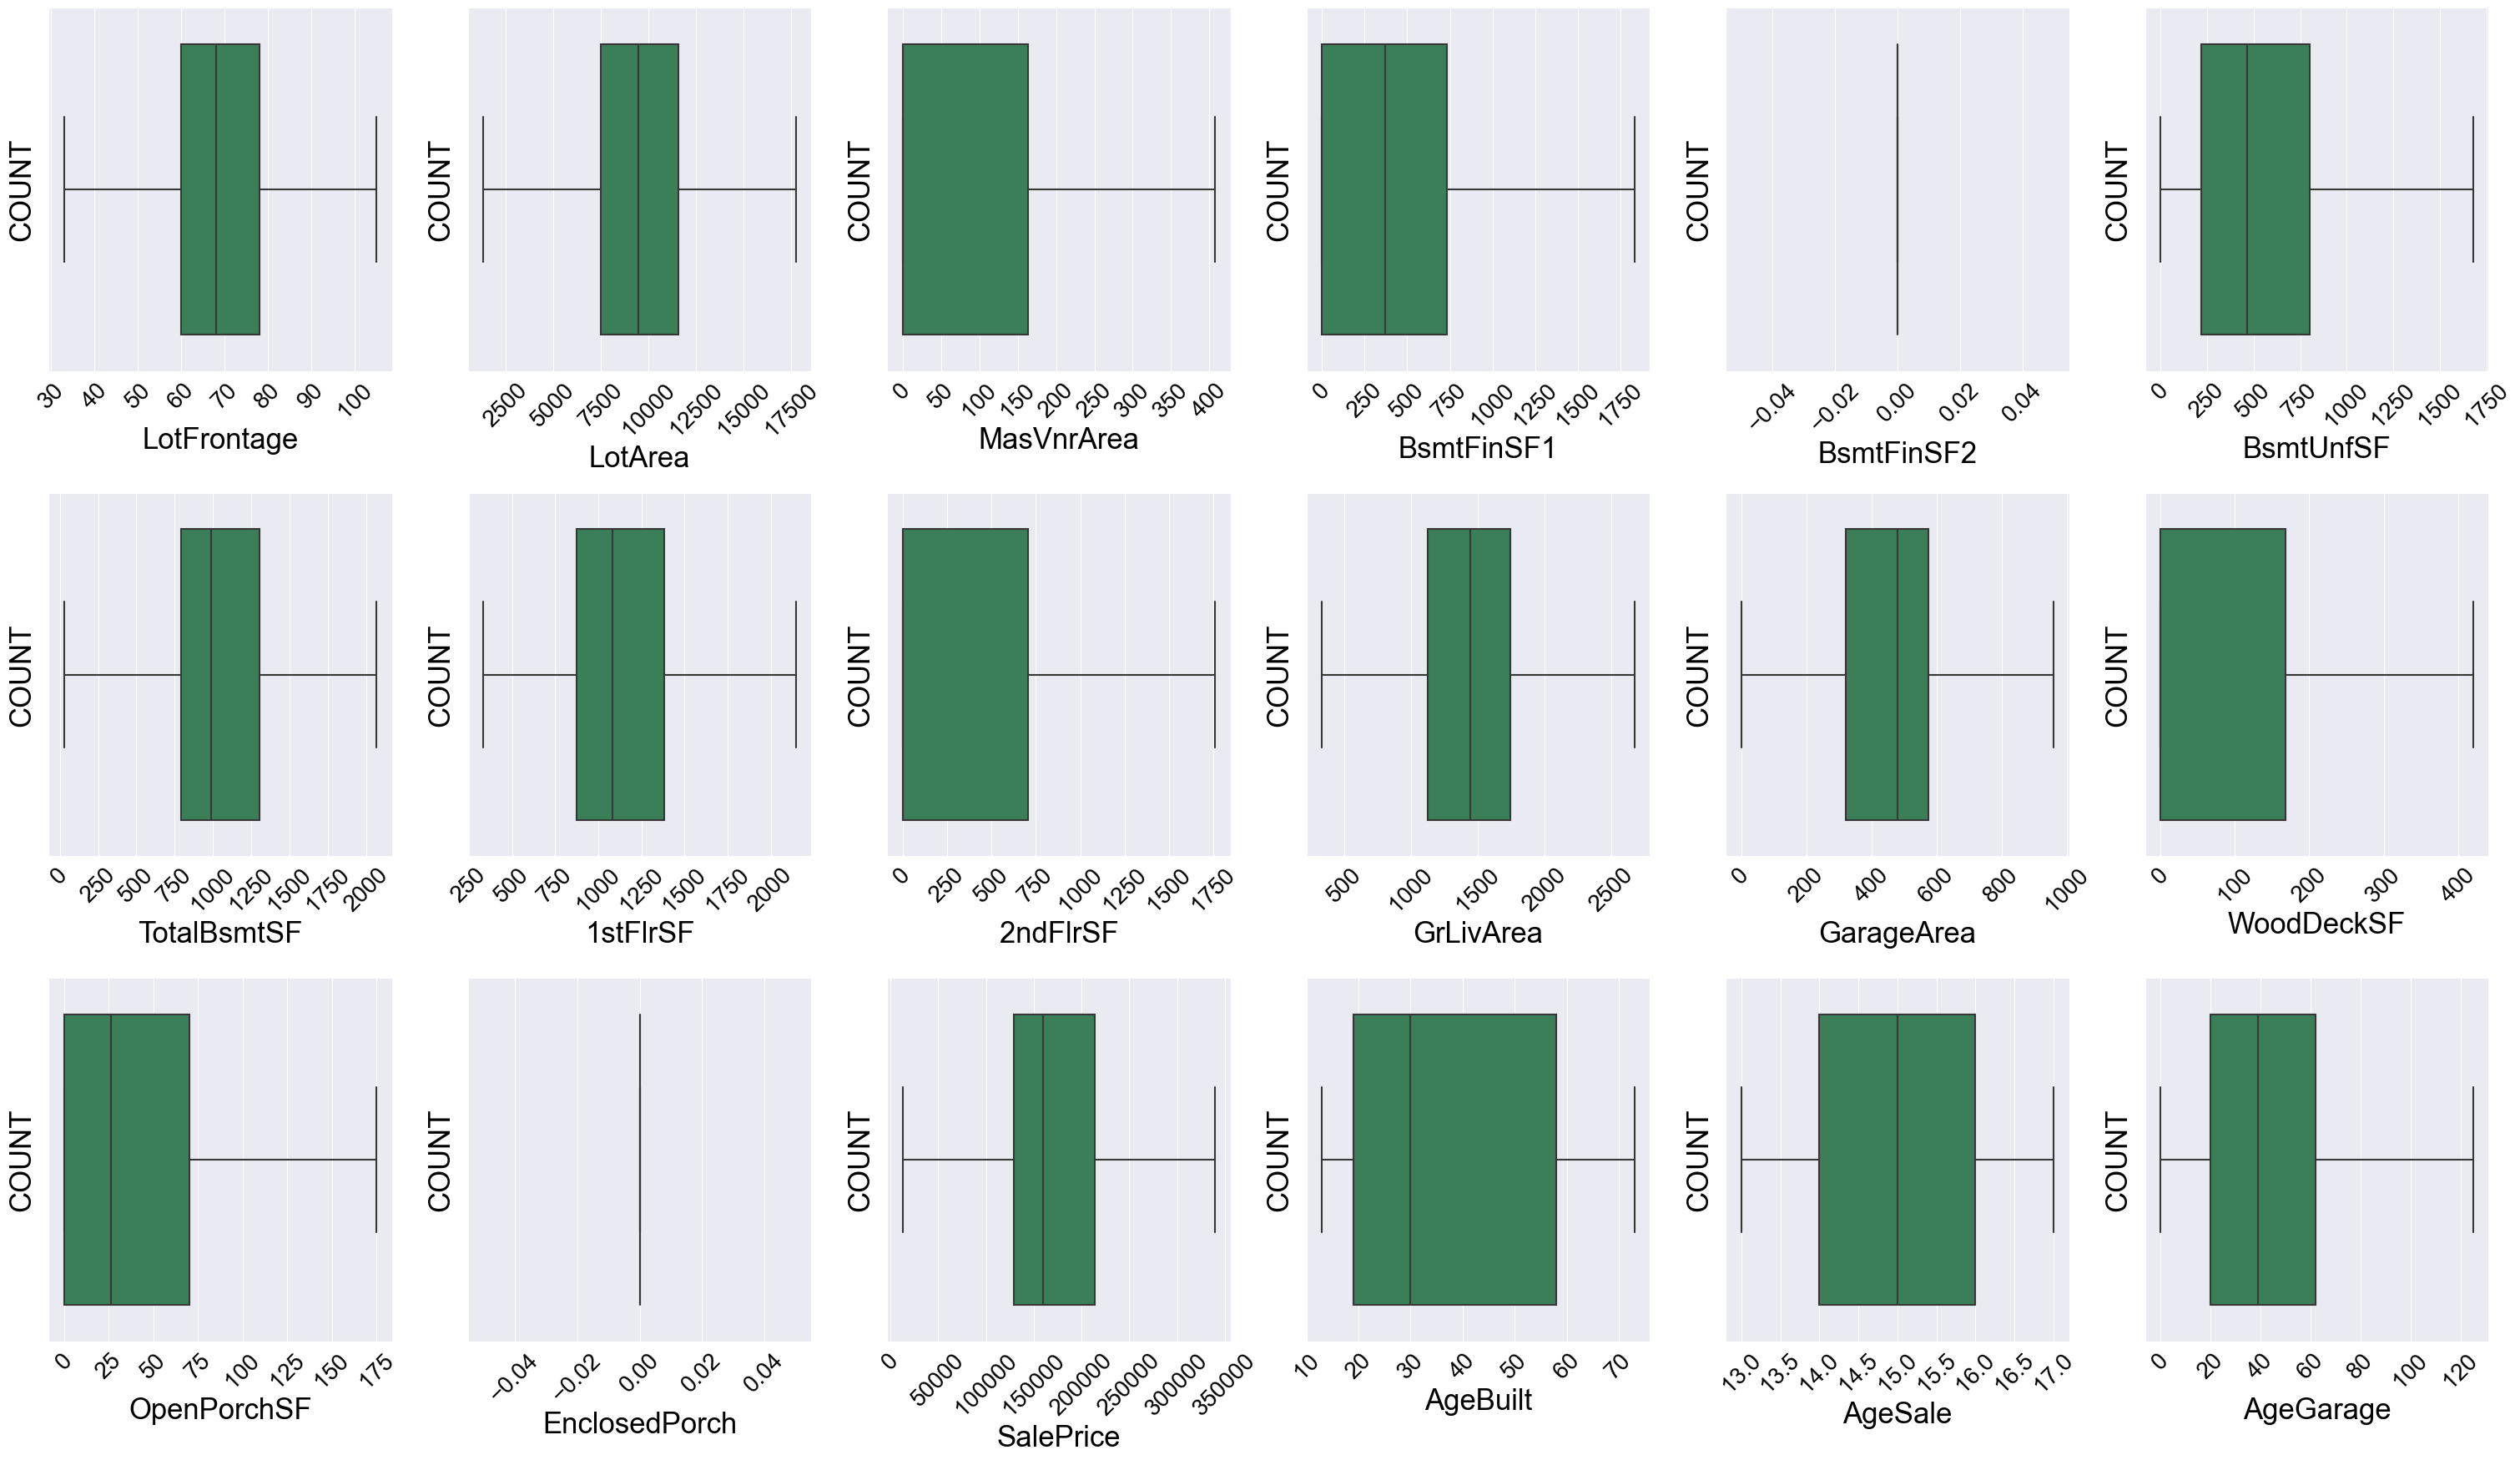

In [117]:
fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_cols_original):
    plt.subplot(26,6,index+1)
    sns.boxplot(x=col, data=train.dropna(), color='seagreen')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )

fig.tight_layout(pad=1.0)

In [118]:
train.describe().T

count      mean      std      min       25%       50%  \
Id            2913.00   1459.69   842.84     1.00    730.00   1460.00   
MSSubClass    2913.00     57.15    42.53    20.00     20.00     50.00   
LotFrontage   2913.00     68.47    17.01    33.00     60.00     68.00   
LotArea       2913.00   9577.28  3612.43  1324.50   7476.00   9453.00   
OverallQual   2913.00      6.09     1.41     1.00      5.00      6.00   
OverallCond   2913.00      5.57     1.11     1.00      5.00      5.00   
MasVnrArea    2913.00     87.69   133.05     0.00      0.00      0.00   
BsmtFinSF1    2913.00    437.46   437.08     0.00      0.00    368.00   
BsmtFinSF2    2913.00      0.00     0.00     0.00      0.00      0.00   
BsmtUnfSF     2913.00    557.63   431.06     0.00    220.00    467.00   
TotalBsmtSF   2913.00   1044.83   407.63    29.50    793.00    988.00   
1stFlrSF      2913.00   1152.66   364.37   334.00    876.00   1082.00   
2ndFlrSF      2913.00    336.32   427.82     0.00      0.00      0.00   
GrLivArea     2913.00   1489.99   468.67   334.00   1125.00   1444.00   
BsmtFullBath  2913.00      0.43     0.52     0.00      0.00      0.00   
FullBath      2913.00      1.57     0.55     0.00      1.00      2.00   
HalfBath      2913.00      0.38     0.50     0.00      0.00      0.00   
BedroomAbvGr  2913.00      2.86     0.82     0.00      2.00      3.00   
KitchenAbvGr  2913.00      1.04     0.21     0.00      1.00      1.00   
TotRmsAbvGrd  2913.00      6.45     1.56     2.00      5.00      6.00   
Fireplaces    2913.00      0.60     0.65     0.00      0.00      1.00   
GarageCars    2913.00      1.77     0.76     0.00      1.00      2.00   
GarageArea    2913.00    470.47   208.61     0.00    320.00    480.00   
WoodDeckSF    2913.00     90.98   115.83     0.00      0.00      0.00   
OpenPorchSF   2913.00     43.45    53.48     0.00      0.00     26.00   
EnclosedPorch 2913.00      0.00     0.00     0.00      0.00      0.00   
MoSold        2913.00      6.21     2.71     1.00      4.00      6.00   
SalePrice     2913.00 176977.84 68028.76 12789.00 129250.00 160000.00   
AgeBuilt      2913.00     38.75    20.89    13.00     19.00     30.00   
AgeSale       2913.00     15.21     1.32    13.00     14.00     15.00   
AgeGarage     2913.00     42.52    26.54     0.00     20.00     39.00   

                    75%       max  
Id              2189.00   2919.00  
MSSubClass        70.00    190.00  
LotFrontage       78.00    105.00  
LotArea        11577.00  17728.50  
OverallQual        7.00     10.00  
OverallCond        6.00      9.00  
MasVnrArea       163.00    407.50  
BsmtFinSF1       733.00   1832.50  
BsmtFinSF2         0.00      0.00  
BsmtUnfSF        803.00   1677.50  
TotalBsmtSF     1302.00   2065.50  
1stFlrSF        1384.00   2146.00  
2ndFlrSF         704.00   1760.00  
GrLivArea       1743.00   2670.00  
BsmtFullBath       1.00      3.00  
FullBath           2.00      4.00  
HalfBath           1.00      2.00  
BedroomAbvGr       3.00      8.00  
KitchenAbvGr       1.00      3.00  
TotRmsAbvGrd       7.00     14.00  
Fireplaces         1.00      4.00  
GarageCars         2.00      5.00  
GarageArea       576.00    960.00  
WoodDeckSF       168.00    420.00  
OpenPorchSF       70.00    175.00  
EnclosedPorch      0.00      0.00  
MoSold             8.00     12.00  
SalePrice     213500.00 339875.00  
AgeBuilt          58.00     73.00  
AgeSale           16.00     17.00  
AgeGarage         62.00    125.00

In [119]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea    Alley LotShape  \
0 1.00       60.00       RL        65.00  8450.00  Absence      Reg   
1 2.00       20.00       RL        80.00  9600.00  Absence      Reg   
2 3.00       60.00       RL        68.00 11250.00  Absence      IR1   
3 4.00       70.00       RL        60.00  9550.00  Absence      IR1   
4 5.00       60.00       RL        84.00 14260.00  Absence      IR1   

  LandContour      LotConfig   Neighborhood Condition1 BldgType HouseStyle  \
0         Lvl         Inside        CollgCr       Norm     1Fam     2Story   
1         Lvl  rare_category  rare_category      Feedr     1Fam     1Story   
2         Lvl         Inside        CollgCr       Norm     1Fam     2Story   
3         Lvl         Corner  rare_category       Norm     1Fam     2Story   
4         Lvl  rare_category  rare_category       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle Exterior1st    Exterior2nd MasVnrType  \
0         7.00         5.00     Gable     VinylSd        VinylSd    BrkFace   
1         6.00         8.00     Gable     MetalSd        MetalSd    BrkFace   
2         7.00         5.00     Gable     VinylSd        VinylSd    BrkFace   
3         7.00         5.00     Gable     Wd Sdng  rare_category    BrkFace   
4         8.00         5.00     Gable     VinylSd        VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual       BsmtCond  \
0      196.00        Gd        TA      PConc       Gd             TA   
1        0.00        TA        TA     CBlock       Gd             TA   
2      162.00        Gd        TA      PConc       Gd             TA   
3        0.00        TA        TA     BrkTil       TA  rare_category   
4      350.00        Gd        TA      PConc       Gd             TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ      706.00          Unf        0.00     150.00   
1           Gd          ALQ      978.00          Unf        0.00     284.00   
2           Mn          GLQ      486.00          Unf        0.00     434.00   
3           No          ALQ      216.00          Unf        0.00     540.00   
4           Av          GLQ      655.00          Unf        0.00     490.00   

   TotalBsmtSF HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0       856.00        Ex          Y      SBrkr    856.00    854.00    1710.00   
1      1262.00        Ex          Y      SBrkr   1262.00      0.00    1262.00   
2       920.00        Ex          Y      SBrkr    920.00    866.00    1786.00   
3       756.00        Gd          Y      SBrkr    961.00    756.00    1717.00   
4      1145.00        Ex          Y      SBrkr   1145.00   1053.00    2198.00   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0          1.00      2.00      1.00          3.00          1.00          Gd   
1          0.00      2.00      0.00          3.00          1.00          TA   
2          1.00      2.00      1.00          3.00          1.00          Gd   
3          1.00      1.00      0.00          3.00          1.00          Gd   
4          1.00      2.00      1.00          4.00          1.00          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0          8.00        Typ        0.00     Absence     Attchd          RFn   
1          6.00        Typ        1.00          TA     Attchd          RFn   
2          6.00        Typ        1.00          TA     Attchd          RFn   
3          7.00        Typ        1.00          Gd     Detchd          Unf   
4          9.00        Typ        1.00          TA     Attchd          RFn   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0        2.00      548.00         TA         TA          Y        0.00   
1        2.00      460.00         TA         TA          Y      298.00   
2        2.00      608.00         TA         TA          Y        0.00  

### 2.3.C Creating New Features

In [120]:
train['BsmtType1_ratio'] = train['BsmtFinSF1'] / train['TotalBsmtSF']
train['BsmtType2_ratio'] = train['BsmtFinSF2'] / train['TotalBsmtSF']
train['BsmtUnfinished_ratio'] = train['BsmtUnfSF'] / train['TotalBsmtSF']
train['enclosedporch_ratio'] = train['EnclosedPorch'] / train['LotArea']
train['Garage_ratio'] = train['GarageArea'] / train['LotArea']
train['OpenPorch_ratio'] = train['OpenPorchSF'] / train['LotArea']
train['TotalBsmt_ratio'] = train['TotalBsmtSF'] / train['LotArea']
train['WoodDeck_ratio'] = train['WoodDeckSF'] / train['LotArea']

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2913 non-null   float64
 1   MSSubClass            2913 non-null   float64
 2   MSZoning              2913 non-null   object 
 3   LotFrontage           2913 non-null   float64
 4   LotArea               2913 non-null   float64
 5   Alley                 2913 non-null   object 
 6   LotShape              2913 non-null   object 
 7   LandContour           2913 non-null   object 
 8   LotConfig             2913 non-null   object 
 9   Neighborhood          2913 non-null   object 
 10  Condition1            2913 non-null   object 
 11  BldgType              2913 non-null   object 
 12  HouseStyle            2913 non-null   object 
 13  OverallQual           2913 non-null   float64
 14  OverallCond           2913 non-null   float64
 15  RoofStyle             2913

### 2.3.D Encoding (Label and One Hot)

In [122]:
train[['Alley', 'LandContour', 'BsmtCond', 'BsmtFinType2']]

Alley LandContour       BsmtCond BsmtFinType2
0     Absence         Lvl             TA          Unf
1     Absence         Lvl             TA          Unf
2     Absence         Lvl             TA          Unf
3     Absence         Lvl  rare_category          Unf
4     Absence         Lvl             TA          Unf
...       ...         ...            ...          ...
1454  Absence         Lvl             TA          Unf
1455  Absence         Lvl             TA          Unf
1456  Absence         Lvl             TA          Unf
1457  Absence         Lvl             TA          Unf
1458  Absence         Lvl             TA          Unf

[2913 rows x 4 columns]

In [123]:
for col in train[['Alley', 'LandContour', 'BsmtCond', 'BsmtFinType2']]:
  print(train[col].value_counts())

Alley
Absence          2716
rare_category     197
Name: count, dtype: int64
LandContour
Lvl              2618
rare_category     295
Name: count, dtype: int64
BsmtCond
TA               2600
rare_category     313
Name: count, dtype: int64
BsmtFinType2
Unf              2487
rare_category     426
Name: count, dtype: int64


In [124]:
# TRAIN
from sklearn.preprocessing import LabelEncoder

binary_cols = [col for col in train.columns if train[col].dtypes == "O" and train[col].nunique() == 2]
binary_cols

# Binary kolonlar label encoder yapacağız.
labelencoder = LabelEncoder()

for col in binary_cols:
    labelencoder = LabelEncoder()
    train[col] = labelencoder.fit_transform(train[col])

In [125]:
binary_cols

['Alley',
 'LandContour',
 'BsmtCond',
 'BsmtFinType2',
 'CentralAir',
 'Functional',
 'Fence_',
 'Fireplace_',
 'Garage_',
 'Alley_']

In [126]:
for col in train[['Alley', 'LandContour', 'BsmtCond', 'BsmtFinType2']]:
  print(train[col].value_counts())

Alley
0    2716
1     197
Name: count, dtype: int64
LandContour
0    2618
1     295
Name: count, dtype: int64
BsmtCond
0    2600
1     313
Name: count, dtype: int64
BsmtFinType2
0    2487
1     426
Name: count, dtype: int64


In [127]:
train.shape

(2913, 79)

In [128]:
train.describe().T

count      mean      std      min       25%       50%  \
Id                   2913.00   1459.69   842.84     1.00    730.00   1460.00   
MSSubClass           2913.00     57.15    42.53    20.00     20.00     50.00   
LotFrontage          2913.00     68.47    17.01    33.00     60.00     68.00   
LotArea              2913.00   9577.28  3612.43  1324.50   7476.00   9453.00   
Alley                2913.00      0.07     0.25     0.00      0.00      0.00   
LandContour          2913.00      0.10     0.30     0.00      0.00      0.00   
OverallQual          2913.00      6.09     1.41     1.00      5.00      6.00   
OverallCond          2913.00      5.57     1.11     1.00      5.00      5.00   
MasVnrArea           2913.00     87.69   133.05     0.00      0.00      0.00   
BsmtCond             2913.00      0.11     0.31     0.00      0.00      0.00   
BsmtFinSF1           2913.00    437.46   437.08     0.00      0.00    368.00   
BsmtFinType2         2913.00      0.15     0.35     0.00      0.00      0.00   
BsmtFinSF2           2913.00      0.00     0.00     0.00      0.00      0.00   
BsmtUnfSF            2913.00    557.63   431.06     0.00    220.00    467.00   
TotalBsmtSF          2913.00   1044.83   407.63    29.50    793.00    988.00   
CentralAir           2913.00      0.93     0.25     0.00      1.00      1.00   
1stFlrSF             2913.00   1152.66   364.37   334.00    876.00   1082.00   
2ndFlrSF             2913.00    336.32   427.82     0.00      0.00      0.00   
GrLivArea            2913.00   1489.99   468.67   334.00   1125.00   1444.00   
BsmtFullBath         2913.00      0.43     0.52     0.00      0.00      0.00   
FullBath             2913.00      1.57     0.55     0.00      1.00      2.00   
HalfBath             2913.00      0.38     0.50     0.00      0.00      0.00   
BedroomAbvGr         2913.00      2.86     0.82     0.00      2.00      3.00   
KitchenAbvGr         2913.00      1.04     0.21     0.00      1.00      1.00   
TotRmsAbvGrd         2913.00      6.45     1.56     2.00      5.00      6.00   
Functional           2913.00      0.07     0.25     0.00      0.00      0.00   
Fireplaces           2913.00      0.60     0.65     0.00      0.00      1.00   
GarageCars           2913.00      1.77     0.76     0.00      1.00      2.00   
GarageArea           2913.00    470.47   208.61     0.00    320.00    480.00   
WoodDeckSF           2913.00     90.98   115.83     0.00      0.00      0.00   
OpenPorchSF          2913.00     43.45    53.48     0.00      0.00     26.00   
EnclosedPorch        2913.00      0.00     0.00     0.00      0.00      0.00   
MoSold               2913.00      6.21     2.71     1.00      4.00      6.00   
SalePrice            2913.00 176977.84 68028.76 12789.00 129250.00 160000.00   
Fence_               2913.00      0.20     0.40     0.00      0.00      0.00   
Fireplace_           2913.00      0.51     0.50     0.00      0.00      1.00   
Garage_              2913.00      0.95     0.23     0.00      1.00      1.00   
Alley_               2913.00      0.07     0.25     0.00      0.00      0.00   
AgeBuilt             2913.00     38.75    20.89    13.00     19.00     30.00   
AgeSale              2913.00     15.21     1.32    13.00     14.00     15.00   
AgeGarage            2913.00     42.52    26.54     0.00     20.00     39.00   
BsmtType1_ratio      2913.00      0.39     0.34     0.00      0.00      0.41   
BsmtType2_ratio      2913.00      0.00     0.00     0.00      0.00      0.00   
BsmtUnfinished_ratio 2913.00      0.54     0.37     0.00      0.22      0.47   
enclosedporch_ratio  2913.00      0.00     0.00     0.00      0.00      0.00   
Garage_ratio         2913.00      0.06     0.04     0.00      0.04      0.05   
OpenPorch_ratio      2913.00      0.01     0.01     0.00      0.00      0.00   
TotalBsmt_ratio      2913.00      0.13     0.07     0.00      0.08      0.11   
WoodDeck_ratio       2913.00      0.01     0.02     0.00      0.00      0.00   

                      

In [129]:
train['SaleCondition'].value_counts()

SaleCondition
Normal           2398
Partial           243
Abnorml           190
rare_category      82
Name: count, dtype: int64

In [130]:
from sklearn.base import TransformerMixin
# TRAIN - Kategorik kolonlar için one hot encoder uygulayacağız.
num_cols = [col for col in train.columns if train[col].dtype != 'object']
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in num_cols]
cat_cols

encode_train = pd.get_dummies(train, columns=cat_cols, drop_first=True)

In [131]:
encode_train.shape

(2913, 139)

In [132]:
encode_train[['SaleCondition_Normal','SaleCondition_Partial','SaleCondition_rare_category']].head(6)

SaleCondition_Normal  SaleCondition_Partial  SaleCondition_rare_category
0                  True                  False                        False
1                  True                  False                        False
2                  True                  False                        False
3                 False                  False                        False
4                  True                  False                        False
5                  True                  False                        False

In [133]:
encode_train

Id  MSSubClass  LotFrontage  LotArea  Alley  LandContour  \
0       1.00       60.00        65.00  8450.00      0            0   
1       2.00       20.00        80.00  9600.00      0            0   
2       3.00       60.00        68.00 11250.00      0            0   
3       4.00       70.00        60.00  9550.00      0            0   
4       5.00       60.00        84.00 14260.00      0            0   
...      ...         ...          ...      ...    ...          ...   
1454 2915.00      160.00        33.00  1936.00      0            0   
1455 2916.00      160.00        33.00  1894.00      0            0   
1456 2917.00       20.00       105.00 17728.50      0            0   
1457 2918.00       85.00        62.00 10441.00      0            0   
1458 2919.00       60.00        74.00  9627.00      0            0   

      OverallQual  OverallCond  MasVnrArea  BsmtCond  BsmtFinSF1  \
0            7.00         5.00      196.00         0      706.00   
1            6.00         8.00        0.00         0      978.00   
2            7.00         5.00      162.00         0      486.00   
3            7.00         5.00        0.00         1      216.00   
4            8.00         5.00      350.00         0      655.00   
...           ...          ...         ...       ...         ...   
1454         4.00         7.00        0.00         0        0.00   
1455         4.00         5.00        0.00         0      252.00   
1456         5.00         7.00        0.00         0     1224.00   
1457         5.00         5.00        0.00         0      337.00   
1458         7.00         5.00       94.00         0      758.00   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
0                0        0.00     150.00       856.00           1    856.00   
1                0        0.00     284.00      1262.00           1   1262.00   
2                0        0.00     434.00       920.00           1    920.00   
3                0        0.00     540.00       756.00           1    961.00   
4                0        0.00     490.00      1145.00           1   1145.00   
...            ...         ...        ...          ...         ...       ...   
1454             0        0.00     546.00       546.00           1    546.00   
1455             0        0.00     294.00       546.00           1    546.00   
1456             0        0.00       0.00      1224.00           1   1224.00   
1457             0        0.00     575.00       912.00           1    970.00   
1458             0        0.00     238.00       996.00           1    996.00   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854.00    1710.00          1.00      2.00      1.00          3.00   
1         0.00    1262.00          0.00      2.00      0.00          3.00   
2       866.00    1786.00          1.00      2.00      1.00          3.00   
3       756.00    1717.00          1.00      1.00      0.00          3.00   
4      1053.00    2198.00          1.00      2.00      1.00          4.00   
...        ...        ...           ...       ...       ...           ...   
1454    546.00    1092.00          0.00      1.00      1.00          3.00   
1455    546.00    1092.00          0.00      1.00      1.00          3.00   
1456      0.00    1224.00          1.00      1.00      0.00          4.00   
1457      0.00     970.00          0.00      1.00      0.00          3.00   
1458   1004.00    2000.00          0.00      2.00      1.00          3.00   

      KitchenAbvGr  TotRmsAbvGrd  Functional  Fireplaces  GarageCars  \
0             1.00          8.00           0        0.00        2.00   
1             1.00          6.00           0        1.00        2.00   
2             1.00          6.00           0        1.00        2.00   
3             1.00          7.00           0        1.00        3.00   
4             1.00          9.00           0        1.00        3.00   
...            ...           ...  

# 3.Feature Selection

In [134]:
id_col = encode_train['Id']  # Id kolonunu ayrı bir değişkende sakla
encode_train = encode_train.set_index('Id')  # Id kolonunu indeks olarak ayır

In [135]:
encode_train[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'AgeBuilt', 'BsmtFinSF1', 'LotArea', 'OverallCond','SalePrice']]

OverallQual  GrLivArea  TotalBsmtSF  GarageCars  AgeBuilt  \
Id                                                                   
1.00            7.00    1710.00       856.00        2.00     20.00   
2.00            6.00    1262.00      1262.00        2.00     47.00   
3.00            7.00    1786.00       920.00        2.00     21.00   
4.00            7.00    1717.00       756.00        3.00     53.00   
5.00            8.00    2198.00      1145.00        3.00     23.00   
...              ...        ...          ...         ...       ...   
2915.00         4.00    1092.00       546.00        0.00     53.00   
2916.00         4.00    1092.00       546.00        1.00     53.00   
2917.00         5.00    1224.00      1224.00        2.00     27.00   
2918.00         5.00     970.00       912.00        0.00     31.00   
2919.00         7.00    2000.00       996.00        3.00     29.00   

         BsmtFinSF1  LotArea  OverallCond  SalePrice  
Id                                                    
1.00         706.00  8450.00         5.00  208500.00  
2.00         978.00  9600.00         8.00  181500.00  
3.00         486.00 11250.00         5.00  223500.00  
4.00         216.00  9550.00         5.00  140000.00  
5.00         655.00 14260.00         5.00  250000.00  
...             ...      ...          ...        ...  
2915.00        0.00  1936.00         7.00   90500.00  
2916.00      252.00  1894.00         5.00   71000.00  
2917.00     1224.00 17728.50         7.00  131000.00  
2918.00      337.00 10441.00         5.00  132000.00  
2919.00      758.00  9627.00         5.00  188000.00  

[2913 rows x 9 columns]

In [136]:
y.mean()

12.0

In [137]:
from sklearn.model_selection import train_test_split

X = encode_train.drop('SalePrice', axis=1)
y = encode_train['SalePrice']

X = X[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'AgeBuilt', 'BsmtFinSF1', 'LotArea', 'OverallCond']]
X_val = X.values
y_val = y.values


X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=42)

In [138]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2330, 8)
(2330,)
(583, 8)
(583,)


In [139]:
X

OverallQual  GrLivArea  TotalBsmtSF  GarageCars  AgeBuilt  \
Id                                                                   
1.00            7.00    1710.00       856.00        2.00     20.00   
2.00            6.00    1262.00      1262.00        2.00     47.00   
3.00            7.00    1786.00       920.00        2.00     21.00   
4.00            7.00    1717.00       756.00        3.00     53.00   
5.00            8.00    2198.00      1145.00        3.00     23.00   
...              ...        ...          ...         ...       ...   
2915.00         4.00    1092.00       546.00        0.00     53.00   
2916.00         4.00    1092.00       546.00        1.00     53.00   
2917.00         5.00    1224.00      1224.00        2.00     27.00   
2918.00         5.00     970.00       912.00        0.00     31.00   
2919.00         7.00    2000.00       996.00        3.00     29.00   

         BsmtFinSF1  LotArea  OverallCond  
Id                                         
1.00         706.00  8450.00         5.00  
2.00         978.00  9600.00         8.00  
3.00         486.00 11250.00         5.00  
4.00         216.00  9550.00         5.00  
5.00         655.00 14260.00         5.00  
...             ...      ...          ...  
2915.00        0.00  1936.00         7.00  
2916.00      252.00  1894.00         5.00  
2917.00     1224.00 17728.50         7.00  
2918.00      337.00 10441.00         5.00  
2919.00      758.00  9627.00         5.00  

[2913 rows x 8 columns]

In [140]:
X_val

array([[7.00000e+00, 1.71000e+03, 8.56000e+02, ..., 7.06000e+02,
        8.45000e+03, 5.00000e+00],
       [6.00000e+00, 1.26200e+03, 1.26200e+03, ..., 9.78000e+02,
        9.60000e+03, 8.00000e+00],
       [7.00000e+00, 1.78600e+03, 9.20000e+02, ..., 4.86000e+02,
        1.12500e+04, 5.00000e+00],
       ...,
       [5.00000e+00, 1.22400e+03, 1.22400e+03, ..., 1.22400e+03,
        1.77285e+04, 7.00000e+00],
       [5.00000e+00, 9.70000e+02, 9.12000e+02, ..., 3.37000e+02,
        1.04410e+04, 5.00000e+00],
       [7.00000e+00, 2.00000e+03, 9.96000e+02, ..., 7.58000e+02,
        9.62700e+03, 5.00000e+00]])

# 4.Model Selection

In [141]:
X_train

array([[5.0000e+00, 1.0940e+03, 1.0940e+03, ..., 7.2900e+02, 1.2450e+04,
        5.0000e+00],
       [6.0000e+00, 1.0400e+03, 1.0400e+03, ..., 8.7200e+02, 1.1500e+04,
        4.0000e+00],
       [6.0000e+00, 1.5730e+03, 7.5600e+02, ..., 4.1700e+02, 2.1170e+03,
        5.0000e+00],
       ...,
       [8.0000e+00, 2.0200e+03, 1.1280e+03, ..., 5.8400e+02, 9.8280e+03,
        5.0000e+00],
       [6.0000e+00, 1.0720e+03, 5.4700e+02, ..., 5.4700e+02, 3.6750e+03,
        5.0000e+00],
       [5.0000e+00, 1.0390e+03, 1.0390e+03, ..., 8.4100e+02, 1.1625e+04,
        4.0000e+00]])

In [142]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train the model
xgboostmodel = XGBRegressor()
xgboostmodel.fit(X_train, y_train)

import pickle
pickle.dump(xgboostmodel, open('xgb_model.pkl', 'wb'))